# No Man's Sky.
https://store.steampowered.com/app/275850/No_Mans_Sky/

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json("./data/review_275850.json")

In [3]:
maindata = df[:121916]
metadata = df[121916:]

In [4]:
metadata

,reviews,query_summary,cursors
num_reviews,NaN,100,NaN
review_score,NaN,5,NaN
review_score_desc,NaN,Mixed,NaN
total_positive,NaN,83918,NaN
total_negative,NaN,38000,NaN
total_reviews,NaN,121918,NaN
AoJ4r/zuv9YCccfjXg==,NaN,NaN,Sun May 23 02:12:48 2021


In [5]:
print('The last bits of the json file are metadata. What does the metadata reveal?\n')
print(f"With {metadata['query_summary'][3]} positive reviews and {metadata['query_summary'][4]} negative reviews, the game has a {str.upper(metadata['query_summary'][2])} review of {round(metadata['query_summary'][3]*100/(metadata['query_summary'][5]),2)}%.")

The last bits of the json file are metadata. What does the metadata reveal?

With 83918 positive reviews and 38000 negative reviews, the game has a MIXED review of 68.83%.


We need to transform our json data into a dataframe. Let's start by creating a new data frame with the <b>id</b> column from the reviewers' data.

In [6]:
id_data = [maindata['reviews'][i]['recommendationid'] for i in range(len(maindata))]
mnsdata = pd.DataFrame(id_data, columns = ['id'])
mnsdata

,id
0,92447055
1,92446235
2,92445739
3,92445679
4,92445399
...,...
121911,24845464
121912,24845460
121913,24845437
121914,24845428


We need to add the four following columns from the reviewers' data: <b>Games Owned</b>, <b>Total Reviews</b>, <b>Total Playing Time</b>, and <b>Review Playing Time</b>.

In [7]:
games_owned_data = [maindata['reviews'][i]['author']['num_games_owned'] for i in range(len(maindata))]
reviews_number_data = [maindata['reviews'][i]['author']['num_reviews'] for i in range(len(maindata))]
total_time_data = [maindata['reviews'][i]['author']['playtime_forever'] for i in range(len(maindata))]

mnsdata['Games Owned'] = games_owned_data
mnsdata['Total Reviews'] = reviews_number_data
mnsdata['Total Playing Time'] = total_time_data

mnsdata

,id,Games Owned,Total Reviews,Total Playing Time
0,92447055,266,77,1690
1,92446235,65,30,9954
2,92445739,242,6,3239
3,92445679,98,8,2095
4,92445399,7,2,879
...,...,...,...,...
121911,24845464,985,69,1224
121912,24845460,586,7,2363
121913,24845437,817,9,3186
121914,24845428,201,12,2184


Because <b>Review Playing Time</b> has errors, we need to do some error handling. For every error we run into, we will set the value to zero.

In [8]:
review_time_data = []
for i in range(len(maindata)):
    try:
        review_time_data.append(maindata['reviews'][i]['author']['playtime_at_review'])
    except:
        review_time_data.append(0)

In [9]:
mnsdata['Review Playing Time'] = review_time_data
mnsdata

,id,Games Owned,Total Reviews,Total Playing Time,Review Playing Time
0,92447055,266,77,1690,1690
1,92446235,65,30,9954,9954
2,92445739,242,6,3239,3239
3,92445679,98,8,2095,2095
4,92445399,7,2,879,834
...,...,...,...,...,...
121911,24845464,985,69,1224,1026
121912,24845460,586,7,2363,1856
121913,24845437,817,9,3186,1155
121914,24845428,201,12,2184,1198


We also need to add five more columns: <b>Reviews</b>, <b>Recommended?</b>, <b>Upvotes</b>, <b>Steam Purchase</b>, and <b>Early Access</b>.

In [10]:
review_votes = [maindata['reviews'][i]['voted_up'] for i in range(len(maindata))]
upvotes = [maindata['reviews'][i]['votes_up'] for i in range(len(maindata))]
steam_purchase = [maindata['reviews'][i]['steam_purchase'] for i in range(len(maindata))]
early_access = [maindata['reviews'][i]['written_during_early_access'] for i in range(len(maindata))]
reviews_data = [maindata['reviews'][i]['review'] for i in range(len(maindata))]

mnsdata['Reviews'] = reviews_data
mnsdata['Recommended?'] = review_votes
mnsdata['Upvotes'] = upvotes
mnsdata['Steam Purchase'] = steam_purchase
mnsdata['Early Access'] = early_access

mnsdata

,id,Games Owned,Total Reviews,Total Playing Time,Review Playing Time,Reviews,Recommended?,Upvotes,Steam Purchase,Early Access
0,92447055,266,77,1690,1690,this is a game on the steam store,False,1,True,False
1,92446235,65,30,9954,9954,Space is great fun yes is great fun\n,True,1,False,False
2,92445739,242,6,3239,3239,Played half of my time on launch day in 2016 a...,True,0,True,False
3,92445679,98,8,2095,2095,Pretty impressive that they went out and made ...,True,0,True,False
4,92445399,7,2,879,834,"Very fun open world game, however the multipla...",True,0,True,False
...,...,...,...,...,...,...,...,...,...,...
121911,24845464,985,69,1224,1026,"Quite nice, actually.",True,1,True,False
121912,24845460,586,7,2363,1856,Rest in peace Harambe. Your name will always b...,True,0,True,False
121913,24845437,817,9,3186,1155,"1ST PUBLIC REVIEW!\n\nEDIT: Quick tips, left c...",True,31,True,False
121914,24845428,201,12,2184,1198,Its pretty good tbh\nEDIT: Its pretty good but...,False,0,True,False


We still need dates, so let's create the dates: <b>Date</b>, <b>Yearly</b>, and <b>Monthly</b>.

In [11]:
timestamp = [maindata['reviews'][i]['timestamp_updated'] for i in range(len(maindata))]
date = [datetime.fromtimestamp(timestamp[i]).strftime('%Y-%m-%d') for i in range(len(timestamp))]

mnsdata['Date'] = date
mnsdata['Yearly'] = mnsdata['Date'].str[0:4]
mnsdata['Monthly'] = mnsdata['Date'].str[0:4]+mnsdata['Date'].str[5:7]

mnsdata

,id,Games Owned,Total Reviews,Total Playing Time,Review Playing Time,Reviews,Recommended?,Upvotes,Steam Purchase,Early Access,Date,Yearly,Monthly
0,92447055,266,77,1690,1690,this is a game on the steam store,False,1,True,False,2021-05-22,2021,202105
1,92446235,65,30,9954,9954,Space is great fun yes is great fun\n,True,1,False,False,2021-05-22,2021,202105
2,92445739,242,6,3239,3239,Played half of my time on launch day in 2016 a...,True,0,True,False,2021-05-22,2021,202105
3,92445679,98,8,2095,2095,Pretty impressive that they went out and made ...,True,0,True,False,2021-05-22,2021,202105
4,92445399,7,2,879,834,"Very fun open world game, however the multipla...",True,0,True,False,2021-05-22,2021,202105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121911,24845464,985,69,1224,1026,"Quite nice, actually.",True,1,True,False,2016-08-13,2016,201608
121912,24845460,586,7,2363,1856,Rest in peace Harambe. Your name will always b...,True,0,True,False,2018-07-25,2018,201807
121913,24845437,817,9,3186,1155,"1ST PUBLIC REVIEW!\n\nEDIT: Quick tips, left c...",True,31,True,False,2016-08-12,2016,201608
121914,24845428,201,12,2184,1198,Its pretty good tbh\nEDIT: Its pretty good but...,False,0,True,False,2016-08-17,2016,201608


That should do it! Let's start answering some questions about <i>No Man's Sky</i>.

### How were the early access reviews?

In [12]:
mnsdata.loc[(mnsdata['Early Access'] == True)]

,id,Games Owned,Total Reviews,Total Playing Time,Review Playing Time,Reviews,Recommended?,Upvotes,Steam Purchase,Early Access,Date,Yearly,Monthly


Nonexistent! <i>No Man's Sky</i> had no early reviews and even the released gameplay was extremely limited. The only real gameplay released was due to someone streaming a leaked copy:

https://techarx.com/26-minutes-no-mans-sky-gameplay-leaked/

The game was subsequently released blind to the public.

### What is the break down of reviews between Steam and non-Steam purchases?

In [13]:
steam_purchase = mnsdata.loc[(mnsdata['Steam Purchase'] == True)].count()[0]
nonsteam_purchase = mnsdata.loc[(mnsdata['Steam Purchase'] == False)].count()[0]

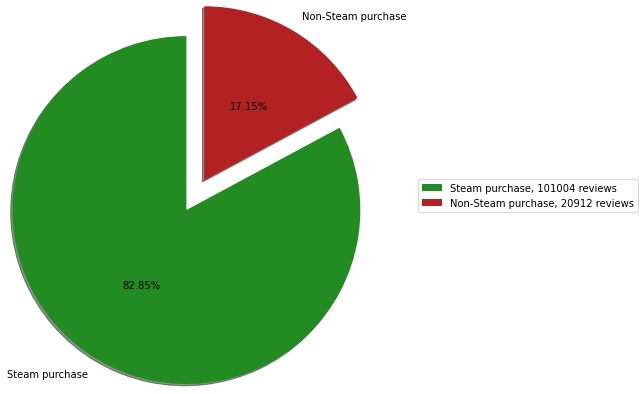

In [14]:
labels = ['Steam purchase', 'Non-Steam purchase']
sizes = [steam_purchase, nonsteam_purchase]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

With over 100.000 reviews, reviewers who bought the game on Steam outnumbered those who did not by about <b>5:1</b>.

### How do the reviews break down between Steam and non-Steam purchases?

In [15]:
steam_purchase_positive = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == True)].count()[0]
steam_purchase_negative = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == False)].count()[0]
nonsteam_purchase_positive = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == True)].count()[0]
nonsteam_purchase_negative = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == False)].count()[0]

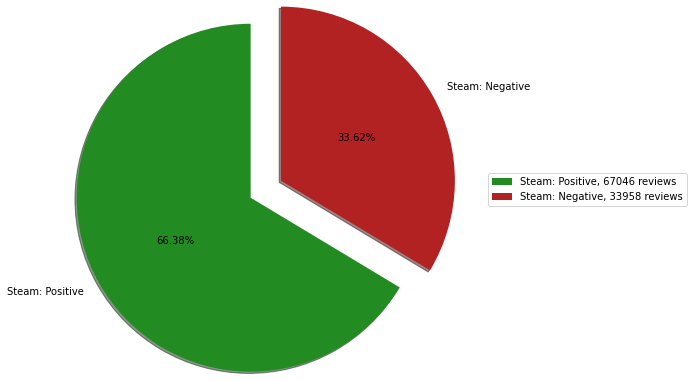

In [16]:
labels = ['Steam: Positive', 'Steam: Negative']
sizes = [steam_purchase_positive, steam_purchase_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

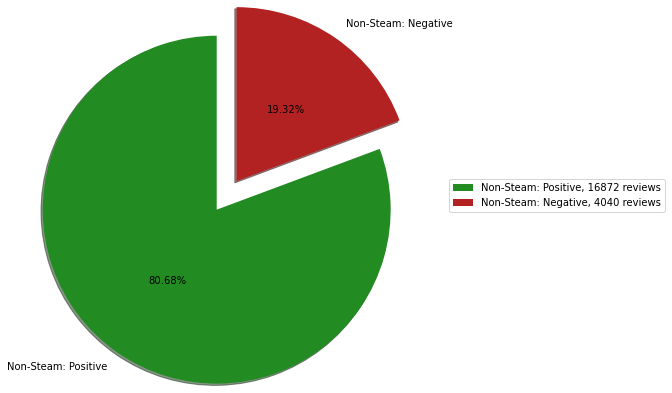

In [17]:
labels = ['Non-Steam: Positive', 'Non-Steam: Negative']
sizes = [nonsteam_purchase_positive, nonsteam_purchase_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

There is a <b>14%</b> difference in positive reviews between Steam and non-Steam purchases. A plausible explanation? By the time <i>No Man's Sky</i> was released on Xbox, the game has updated to a much more playable state than what it was at launch.

### What led to such a discrepency?

In [18]:
steam_purchase_positive_postxbox = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == True) & (mnsdata['Date'] >= '2018-07-24')].count()[0]
steam_purchase_negative_postxbox = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == False) & (mnsdata['Date'] >= '2018-07-24')].count()[0]
nonsteam_purchase_positive_postxbox = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == True) & (mnsdata['Date'] >= '2018-07-24')].count()[0]
nonsteam_purchase_negative_postxbox = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == False) & (mnsdata['Date'] >= '2018-07-24')].count()[0]

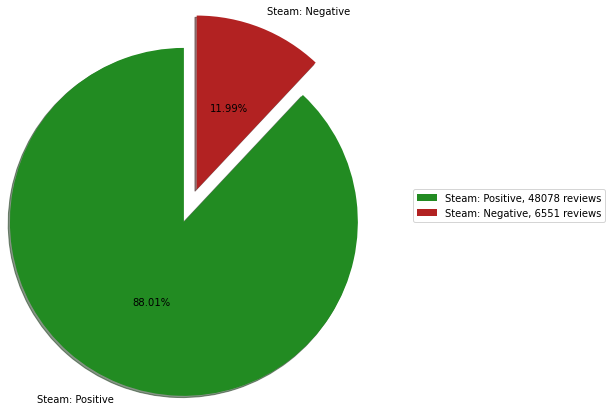

In [19]:
labels = ['Steam: Positive', 'Steam: Negative']
sizes = [steam_purchase_positive_postxbox, steam_purchase_negative_postxbox]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

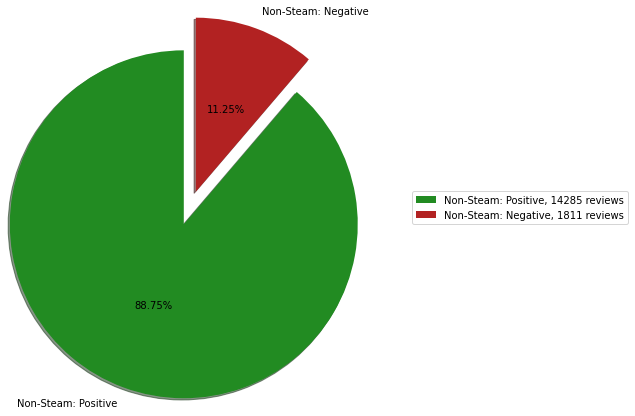

In [20]:
labels = ['Non-Steam: Positive', 'Non-Steam: Negative']
sizes = [nonsteam_purchase_positive_postxbox, nonsteam_purchase_negative_postxbox]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

It was just that!

After the <i>NEXT</i> update, which also released the game on Xbox, the reviews were practically even. This showed just how far the game has come along by the time the update was released.

### What led to the biggest accumulation of negative reviews before the NEXT update?

In [21]:
steam_purchase_positive_postlaunch = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == True) & (mnsdata['Date'] <= '2016-11-25')].count()[0]
steam_purchase_negative_postlaunch = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == False) & (mnsdata['Date'] <= '2016-11-25')].count()[0]
nonsteam_purchase_positive_postlaunch = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == True) & (mnsdata['Date'] <= '2016-11-25')].count()[0]
nonsteam_purchase_negative_postlaunch = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == False) & (mnsdata['Date'] <= '2016-11-25')].count()[0]

postlaunch_by_category_positive = [steam_purchase_positive_postlaunch, nonsteam_purchase_positive_postlaunch]
postlaunch_by_category_negative = [steam_purchase_negative_postlaunch, nonsteam_purchase_negative_postlaunch]

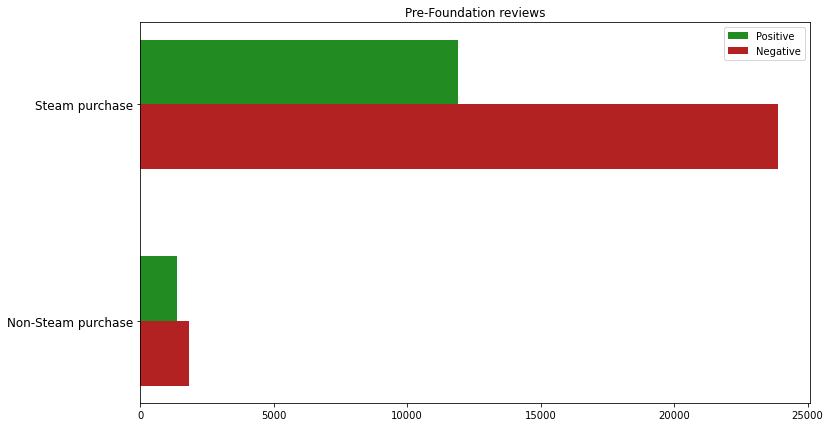

In [22]:
review_playingtime_categories = ('Steam purchase', 'Non-Steam purchase')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Pre-Foundation reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, postlaunch_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, postlaunch_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [23]:
steam_purchase_positive_prexbox = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == True) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2018-07-23')].count()[0]
steam_purchase_negative_prexbox = mnsdata.loc[(mnsdata['Steam Purchase'] == True) & (mnsdata['Recommended?'] == False) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2018-07-23')].count()[0]
nonsteam_purchase_positive_prexbox = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == True) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2018-07-23')].count()[0]
nonsteam_purchase_negative_prexbox = mnsdata.loc[(mnsdata['Steam Purchase'] == False) & (mnsdata['Recommended?'] == False) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2018-07-23')].count()[0]

prexbox_by_category_positive = [steam_purchase_positive_prexbox, nonsteam_purchase_positive_prexbox]
prexbox_by_category_negative = [steam_purchase_negative_prexbox, nonsteam_purchase_negative_prexbox]

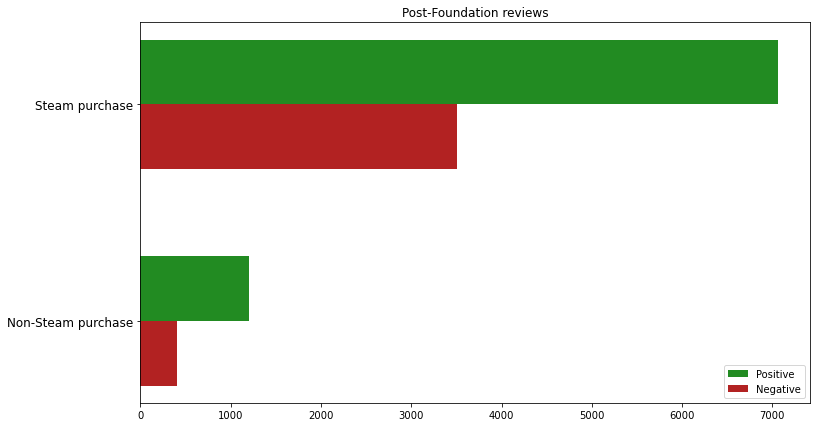

In [24]:
review_playingtime_categories = ('Steam purchase', 'Non-Steam purchase')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Post-Foundation reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, prexbox_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, prexbox_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

It's not even close.

The majority of the negative reviews came during the initial launch by reviewers who bought <i>No Man's Sky</i> on Steam. Since there are 38.000 negative reviews total, the 23.000 or so Steam-purchased negative reviews make up <b>60%</b> of all negative reviews.

### What is the most upvoted review?

In [25]:
mnsdata.loc[(mnsdata['Upvotes'] == max(mnsdata['Upvotes']))]

,id,Games Owned,Total Reviews,Total Playing Time,Review Playing Time,Reviews,Recommended?,Upvotes,Steam Purchase,Early Access,Date,Yearly,Monthly
120723,24849441,167,34,1906,1889,"Overhyped, poorly optimized, indie game made b...",False,16994,True,False,2017-11-23,2017,201711


In [26]:
mnsdata.loc[(mnsdata['Upvotes'] == max(mnsdata['Upvotes']))]['Reviews'].values[0]

'Overhyped, poorly optimized, indie game made by 15 people, being sold for AAA price. It\'s shallow, empty, repetitive and boring. Their 18 quintillion planets are just a bunch of re-color of the same assets, randomly generated with different combinations. Their representation of the universe is inaccurate, every single planet and moon i\'ve seen is inhabited with life and/or vegetation, there are no gas giants, no ring systems. Also, black holes are literally portals. So astronomy enthusiasts, beware, if you thought this would be a space sim you\'re wrong, it is vaguely based on the real universe. \n\nAbout the gameplay, you scan stuff, you mine materials, find some outposts, fill out your ship and your gear, run out of inventory space, go to the nearest space station, sell your sh*t, and then you move on the the next planet. That\'s basically what you do until you reach the center of the galaxy for a NG+. About the combat, the ground and space shooting are mediocre at best. All plane

Submitted a little bit after over a year after release, the reviewer went into details of everything he/she strongly disliked about the game going back as far as pre-release. The review noted the lies and false advertisement the game did in the run-up to release, adding the game was never worth the $60 it was sold for.

With nearly 17.000 upvotes, this review captured how the community felt during <i>No Man's Sky</i>'s release.

### How do the reviews break down by upvotes?

In [27]:
more_than_10 = mnsdata.loc[(mnsdata['Upvotes'] > 10)].count()[0]
at_6_to_10 = mnsdata.loc[(mnsdata['Upvotes'] > 5) & (mnsdata['Upvotes'] <= 10)].count()[0]
at_4_or_5 = mnsdata.loc[(mnsdata['Upvotes'] == 4) | (mnsdata['Upvotes'] == 5)].count()[0]
at_2_or_3 = mnsdata.loc[(mnsdata['Upvotes'] == 2) | (mnsdata['Upvotes'] == 3)].count()[0]
at_1 = mnsdata.loc[(mnsdata['Upvotes'] == 1)].count()[0]
at_0 = mnsdata.loc[(mnsdata['Upvotes'] == 0)].count()[0]

upvotes_by_category = [more_than_10, at_6_to_10, at_4_or_5, at_2_or_3, at_1, at_0]

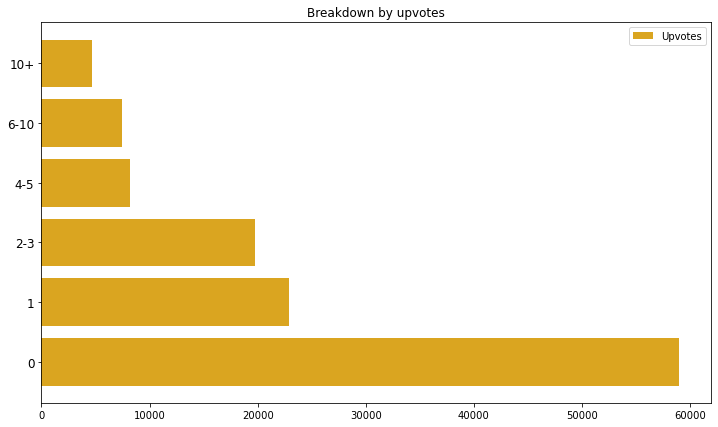

In [28]:
upvote_categories = ('10+', '6-10', '4-5', '2-3', '1', '0')

plt.figure(figsize=(12,7))

plt.title('Breakdown by upvotes')
plt.barh(np.arange(len(upvote_categories)), upvotes_by_category[::-1], label='Upvotes', color='goldenrod')
plt.yticks(range(len(upvote_categories)-1,-1,-1), upvote_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

Over 80.000 reviews have either zero or one upvote, almost another 20.000 reviews have two or three upvotes, and the final 20.000 or so reviews have at least four upvotes.

### How do the ratings break down by upvotes?

In [29]:
more_than_10_positive = mnsdata.loc[(mnsdata['Upvotes'] > 10) & (mnsdata['Recommended?'] == True)].count()[0]
at_6_to_10_positive = mnsdata.loc[((mnsdata['Upvotes'] > 5) & (mnsdata['Upvotes'] <= 10)) & (mnsdata['Recommended?'] == True)].count()[0]
at_4_or_5_positive = mnsdata.loc[((mnsdata['Upvotes'] == 4) | (mnsdata['Upvotes'] == 5)) & (mnsdata['Recommended?'] == True)].count()[0]
at_2_or_3_positive = mnsdata.loc[((mnsdata['Upvotes'] == 2) | (mnsdata['Upvotes'] == 3)) & (mnsdata['Recommended?'] == True)].count()[0]
at_1_positive = mnsdata.loc[(mnsdata['Upvotes'] == 1) & (mnsdata['Recommended?'] == True)].count()[0]
at_0_positive = mnsdata.loc[(mnsdata['Upvotes'] == 0) & (mnsdata['Recommended?'] == True)].count()[0]

more_than_10_negative = mnsdata.loc[(mnsdata['Upvotes'] > 10) & (mnsdata['Recommended?'] == False)].count()[0]
at_6_to_10_negative = mnsdata.loc[((mnsdata['Upvotes'] > 5) & (mnsdata['Upvotes'] <= 10)) & (mnsdata['Recommended?'] == False)].count()[0]
at_4_or_5_negative = mnsdata.loc[((mnsdata['Upvotes'] == 4) | (mnsdata['Upvotes'] == 5)) & (mnsdata['Recommended?'] == False)].count()[0]
at_2_or_3_negative = mnsdata.loc[((mnsdata['Upvotes'] == 2) | (mnsdata['Upvotes'] == 3)) & (mnsdata['Recommended?'] == False)].count()[0]
at_1_negative = mnsdata.loc[(mnsdata['Upvotes'] == 1) & (mnsdata['Recommended?'] == False)].count()[0]
at_0_negative = mnsdata.loc[(mnsdata['Upvotes'] == 0) & (mnsdata['Recommended?'] == False)].count()[0]

upvotes_by_category_positive = [more_than_10_positive, at_6_to_10_positive, at_4_or_5_positive, at_2_or_3_positive, at_1_positive, at_0_positive]
upvotes_by_category_negative = [more_than_10_negative, at_6_to_10_negative, at_4_or_5_negative, at_2_or_3_negative, at_1_negative, at_0_negative]

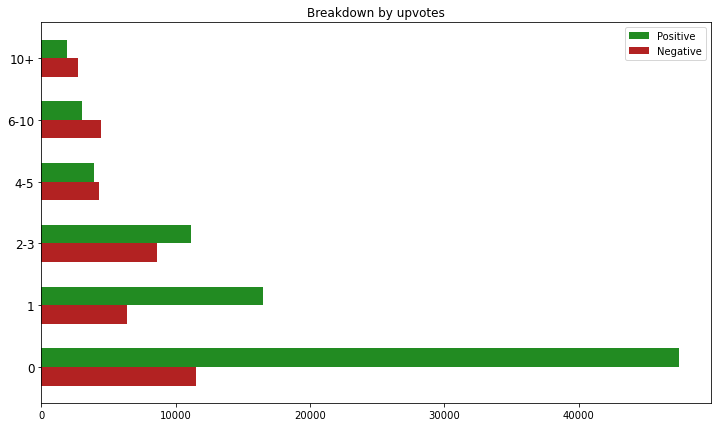

In [30]:
upvote_categories = ('10+', '6-10', '4-5', '2-3', '1', '0')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by upvotes')
plt.barh(np.arange(len(upvotes_by_category_positive))+width/2, upvotes_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(upvotes_by_category_negative))-width/2, upvotes_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(upvote_categories)-1,-1,-1), upvote_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

More likely than not, the more upvoted negative reviews came during the early days of <i>No Man's Sky</i>.

### Did the more upvoted negative reviews come from the early days of launch?

In [31]:
negative_upvoted_reviews_by_year = [mnsdata.loc[(mnsdata['Upvotes'] >= 4) & (mnsdata['Recommended?'] == False) & (mnsdata['Yearly'] == f'20{i}')].count()[0] for i in range(16,22)]

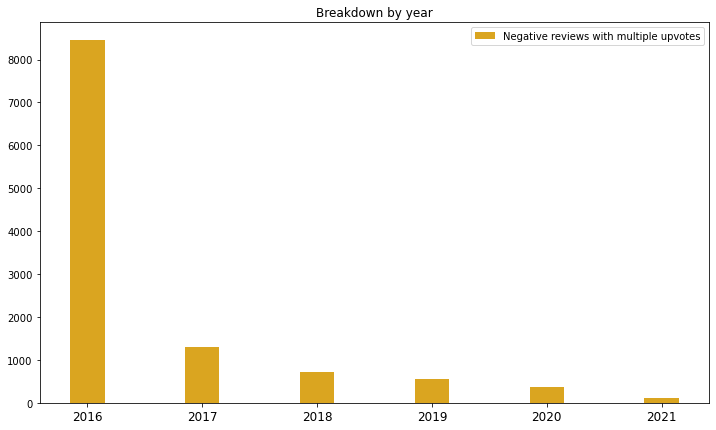

In [32]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years)), negative_upvoted_reviews_by_year, width, label='Negative reviews with multiple upvotes', color='goldenrod')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

Definitely! Out of the nearly 11.500 negative reviews with multiple upvotes, about 8.500 came from 2016. That means 2016's negative reviews make up nearly <b>74%</b> of all negative reviews with multiple upvotes.

### How do the reviews break down by playing time upon review?

In [33]:
review_at_least_week = mnsdata.loc[(mnsdata['Review Playing Time'] >= 10080)].count()[0]
review_at_least_three_days = mnsdata.loc[(mnsdata['Review Playing Time'] >= 4320) & (mnsdata['Review Playing Time'] <= 10079)].count()[0]
review_at_least_two_days = mnsdata.loc[(mnsdata['Review Playing Time'] >= 2880) & (mnsdata['Review Playing Time'] <= 4319)].count()[0]
review_at_least_one_day = mnsdata.loc[(mnsdata['Review Playing Time'] >= 1440) & (mnsdata['Review Playing Time'] <= 2879)].count()[0]
review_at_least_half_day = mnsdata.loc[(mnsdata['Review Playing Time'] >= 720) & (mnsdata['Review Playing Time'] <= 1439)].count()[0]
review_less_than_half_day = mnsdata.loc[(mnsdata['Review Playing Time'] <= 719)].count()[0]

review_playingtime = [review_at_least_week, review_at_least_three_days, review_at_least_two_days, review_at_least_one_day, review_at_least_half_day, review_less_than_half_day]

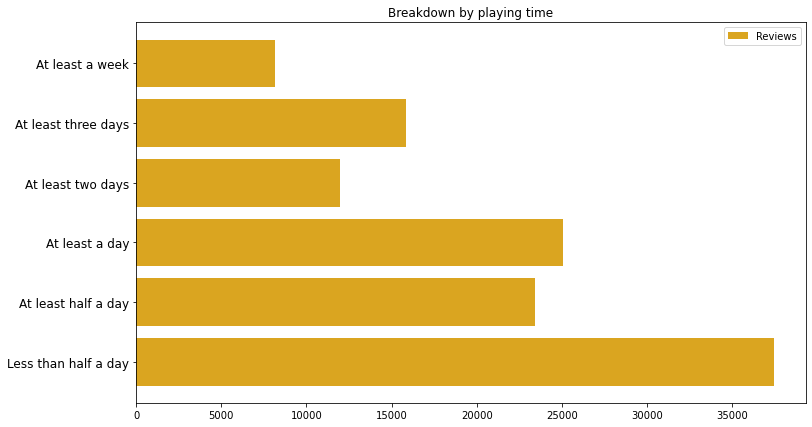

In [34]:
review_playingtime_categories = ('At least a week', 'At least three days', 'At least two days', 'At least a day', 'At least half a day', 'Less than half a day')

plt.figure(figsize=(12,7))

plt.title('Breakdown by playing time at review')
plt.barh(np.arange(len(review_playingtime_categories)), review_playingtime[::-1], label='Reviews', color='goldenrod')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

About half of the reviews were made after less than a day of playing. There are also clusters of reviews made after playing at least a day or at least three days, and this was most likely due to people picking it up once again after a few new updates.

### How do the ratings break down by playing time upon review?

In [35]:
review_at_least_week_positive = mnsdata.loc[(mnsdata['Review Playing Time'] >= 10080) & (mnsdata['Recommended?'] == True)].count()[0]
review_at_least_three_days_positive = mnsdata.loc[(mnsdata['Review Playing Time'] >= 4320) & (mnsdata['Review Playing Time'] <= 10079) & (mnsdata['Recommended?'] == True)].count()[0]
review_at_least_two_days_positive = mnsdata.loc[(mnsdata['Review Playing Time'] >= 2880) & (mnsdata['Review Playing Time'] <= 4319) & (mnsdata['Recommended?'] == True)].count()[0]
review_at_least_one_day_positive = mnsdata.loc[(mnsdata['Review Playing Time'] >= 1440) & (mnsdata['Review Playing Time'] <= 2879) & (mnsdata['Recommended?'] == True)].count()[0]
review_at_least_half_day_positive = mnsdata.loc[(mnsdata['Review Playing Time'] >= 720) & (mnsdata['Review Playing Time'] <= 1439) & (mnsdata['Recommended?'] == True)].count()[0]
review_less_than_half_day_positive = mnsdata.loc[(mnsdata['Review Playing Time'] <= 719) & (mnsdata['Recommended?'] == True)].count()[0]

review_at_least_week_negative = mnsdata.loc[(mnsdata['Review Playing Time'] >= 10080) & (mnsdata['Recommended?'] == False)].count()[0]
review_at_least_three_days_negative = mnsdata.loc[(mnsdata['Review Playing Time'] >= 4320) & (mnsdata['Review Playing Time'] <= 10079) & (mnsdata['Recommended?'] == False)].count()[0]
review_at_least_two_days_negative = mnsdata.loc[(mnsdata['Review Playing Time'] >= 2880) & (mnsdata['Review Playing Time'] <= 4319) & (mnsdata['Recommended?'] == False)].count()[0]
review_at_least_one_day_negative = mnsdata.loc[(mnsdata['Review Playing Time'] >= 1440) & (mnsdata['Review Playing Time'] <= 2879) & (mnsdata['Recommended?'] == False)].count()[0]
review_at_least_half_day_negative = mnsdata.loc[(mnsdata['Review Playing Time'] >= 720) & (mnsdata['Review Playing Time'] <= 1439) & (mnsdata['Recommended?'] == False)].count()[0]
review_less_than_half_day_negative = mnsdata.loc[(mnsdata['Review Playing Time'] <= 719) & (mnsdata['Recommended?'] == False)].count()[0]

review_playingtime_positive = [review_at_least_week_positive, review_at_least_three_days_positive, review_at_least_two_days_positive, review_at_least_one_day_positive, review_at_least_half_day_positive, review_less_than_half_day_positive]
review_playingtime_negative = [review_at_least_week_negative, review_at_least_three_days_negative, review_at_least_two_days_negative, review_at_least_one_day_negative, review_at_least_half_day_negative, review_less_than_half_day_negative]

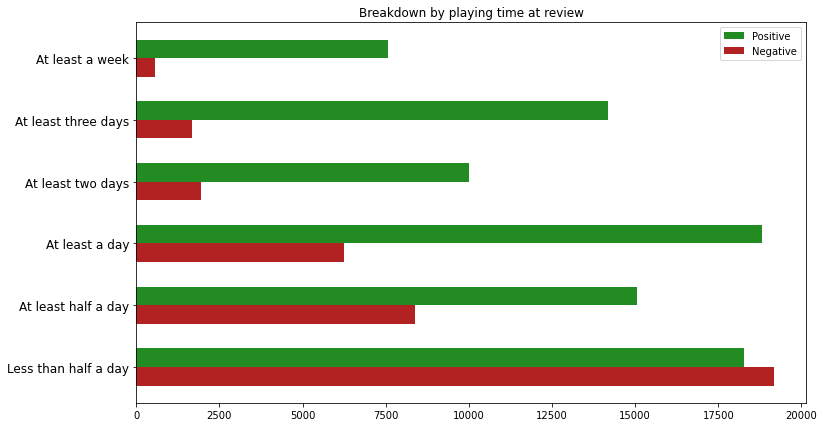

In [36]:
review_playingtime_categories = ('At least a week', 'At least three days', 'At least two days', 'At least a day', 'At least half a day', 'Less than half a day')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by playing time at review')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, review_playingtime_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, review_playingtime_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

What sticks out?
- The two biggest clusters of reviews came from reviewers who either played more than a day and were positive about the game, or they played less than half a day and were negative about the game.
- Positive ratings take over after half a day of playing and become overwhelming after two days of playing.
- The decline in negative reviews from at least one day to at least two days is over <b>half</b>.

That said a lot about how gamers felt about what <i>Hello Games</i> have done with the <i>No Man's Sky</i>.

### Were the negative reviews under half a day of playing mainly during the early days of No Man's Sky?

In [37]:
review_positive_by_year = [mnsdata.loc[(mnsdata['Review Playing Time'] <= 719) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(16,22)]
review_negative_by_year = [mnsdata.loc[(mnsdata['Review Playing Time'] <= 719) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(16,22)]

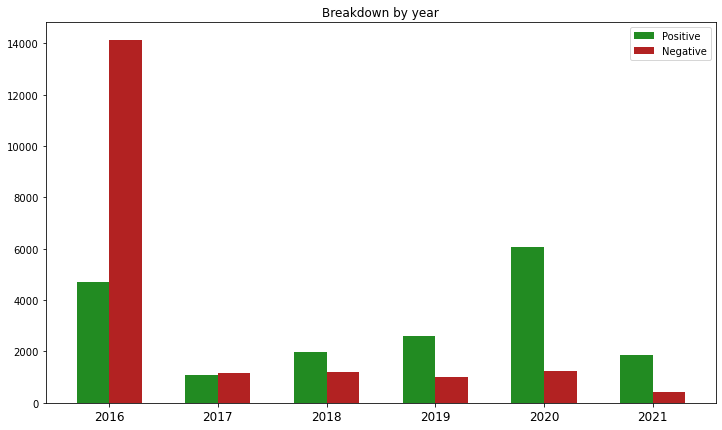

In [38]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, review_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, review_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [39]:
print('Yes!\n')
print(f"There were {review_negative_by_year[0]} negative reviews made in 2016, which would make up {round((review_negative_by_year[0]/sum(review_negative_by_year))*100,2)}% of all negative reviews made under half a day of playing.")

Yes!

There were 14111 negative reviews made in 2016, which would make up 73.61% of all negative reviews made under half a day of playing.


### How do the reviews break down by total playing time?

In [40]:
total_at_least_week = mnsdata.loc[(mnsdata['Total Playing Time'] >= 10080)].count()[0]
total_at_least_three_days = mnsdata.loc[(mnsdata['Total Playing Time'] >= 4320) & (mnsdata['Total Playing Time'] <= 10079)].count()[0]
total_at_least_two_days = mnsdata.loc[(mnsdata['Total Playing Time'] >= 2880) & (mnsdata['Total Playing Time'] <= 4319)].count()[0]
total_at_least_one_day = mnsdata.loc[(mnsdata['Total Playing Time'] >= 1440) & (mnsdata['Total Playing Time'] <= 2879)].count()[0]
total_at_least_half_day = mnsdata.loc[(mnsdata['Total Playing Time'] >= 720) & (mnsdata['Total Playing Time'] <= 1439)].count()[0]
total_less_than_half_day = mnsdata.loc[(mnsdata['Total Playing Time'] <= 719)].count()[0]

total_playingtime = [total_at_least_week, total_at_least_three_days, total_at_least_two_days, total_at_least_one_day, total_at_least_half_day, total_less_than_half_day]

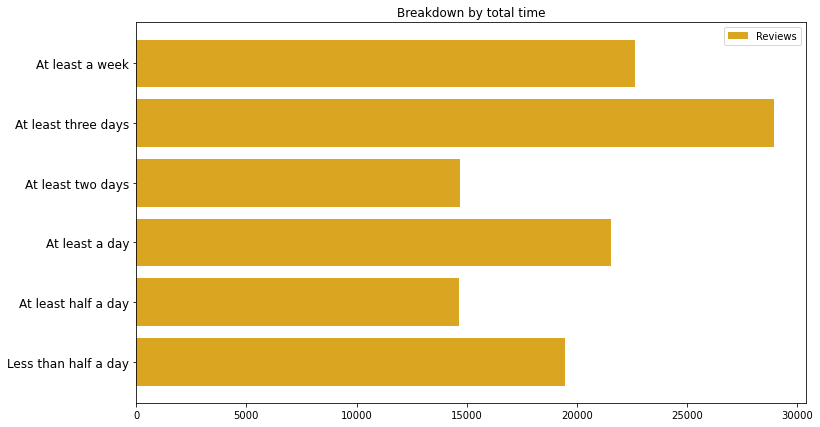

In [41]:
total_playingtime_categories = ('At least a week', 'At least three days', 'At least two days', 'At least a day', 'At least half a day', 'Less than half a day')

plt.figure(figsize=(12,7))

plt.title('Breakdown by total playing time')
plt.barh(np.arange(len(total_playingtime_categories)), total_playingtime[::-1], label='Reviews', color='goldenrod')
plt.yticks(range(len(total_playingtime_categories)-1,-1,-1), total_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [42]:
print(f"At least two days: {sum(review_playingtime[0:2])}. Less than two days: {sum(review_playingtime[2:6])}")
print(f"At least two days: {sum(total_playingtime[0:2])}. Less than two days: {sum(total_playingtime[2:6])}")

At least two days: 24008. Less than two days: 97908
At least two days: 51563. Less than two days: 70353


This shows more hours overall were added by reviewers after their initial reviews. All the numbers below at least two days shrank, which meant a combination of newer players coming in and playing some and older players coming back and playing some more. The share of playing time by reviewers playing at least two days <b>doubled</b> after reviews, which shows just how much staying power the game now has.

### How do the ratings break down by total playing time?

In [43]:
total_at_least_week_positive = mnsdata.loc[(mnsdata['Total Playing Time'] >= 10080) & (mnsdata['Recommended?'] == True)].count()[0]
total_at_least_three_days_positive = mnsdata.loc[(mnsdata['Total Playing Time'] >= 4320) & (mnsdata['Total Playing Time'] <= 10079) & (mnsdata['Recommended?'] == True)].count()[0]
total_at_least_two_days_positive = mnsdata.loc[(mnsdata['Total Playing Time'] >= 2880) & (mnsdata['Total Playing Time'] <= 4319) & (mnsdata['Recommended?'] == True)].count()[0]
total_at_least_one_day_positive = mnsdata.loc[(mnsdata['Total Playing Time'] >= 1440) & (mnsdata['Total Playing Time'] <= 2879) & (mnsdata['Recommended?'] == True)].count()[0]
total_at_least_half_day_positive = mnsdata.loc[(mnsdata['Total Playing Time'] >= 720) & (mnsdata['Total Playing Time'] <= 1439) & (mnsdata['Recommended?'] == True)].count()[0]
total_less_than_half_day_positive = mnsdata.loc[(mnsdata['Total Playing Time'] <= 719) & (mnsdata['Recommended?'] == True)].count()[0]

total_at_least_week_negative = mnsdata.loc[(mnsdata['Total Playing Time'] >= 10080) & (mnsdata['Recommended?'] == False)].count()[0]
total_at_least_three_days_negative = mnsdata.loc[(mnsdata['Total Playing Time'] >= 4320) & (mnsdata['Total Playing Time'] <= 10079) & (mnsdata['Recommended?'] == False)].count()[0]
total_at_least_two_days_negative = mnsdata.loc[(mnsdata['Total Playing Time'] >= 2880) & (mnsdata['Total Playing Time'] <= 4319) & (mnsdata['Recommended?'] == False)].count()[0]
total_at_least_one_day_negative = mnsdata.loc[(mnsdata['Total Playing Time'] >= 1440) & (mnsdata['Total Playing Time'] <= 2879) & (mnsdata['Recommended?'] == False)].count()[0]
total_at_least_half_day_negative = mnsdata.loc[(mnsdata['Total Playing Time'] >= 720) & (mnsdata['Total Playing Time'] <= 1439) & (mnsdata['Recommended?'] == False)].count()[0]
total_less_than_half_day_negative = mnsdata.loc[(mnsdata['Total Playing Time'] <= 719) & (mnsdata['Recommended?'] == False)].count()[0]

total_playingtime_positive = [total_at_least_week_positive, total_at_least_three_days_positive, total_at_least_two_days_positive, total_at_least_one_day_positive, total_at_least_half_day_positive, total_less_than_half_day_positive]
total_playingtime_negative = [total_at_least_week_negative, total_at_least_three_days_negative, total_at_least_two_days_negative, total_at_least_one_day_negative, total_at_least_half_day_negative, total_less_than_half_day_negative]

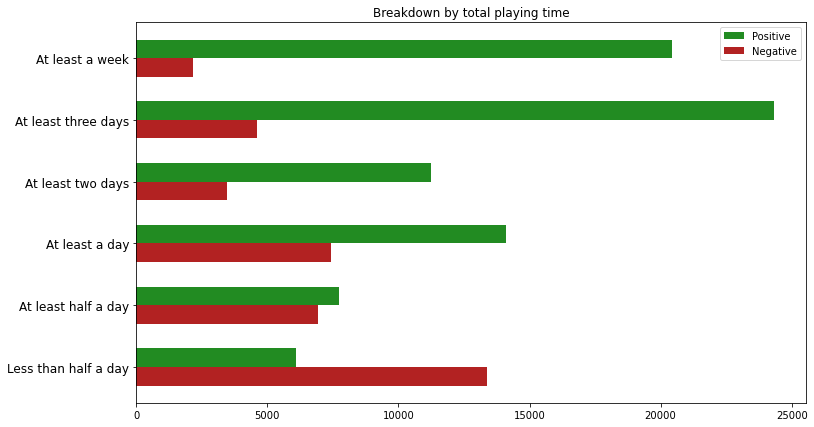

In [44]:
total_playingtime_categories = ('At least a week', 'At least three days', 'At least two days', 'At least a day', 'At least half a day', 'Less than half a day')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by total playing time')
plt.barh(np.arange(len(total_playingtime_categories))+width/2, total_playingtime_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(total_playingtime_categories))-width/2, total_playingtime_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(total_playingtime_categories)-1,-1,-1), total_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

For reviews where the total playing time was less than half a day, the negative reviews outnumbered the positives reviews by 2:1. From at least half a day onwards, positive reviews outpace negative reviews.

The largest cluster of positive reviews tend to gather around at least three days but no more than a week.

### How do the reviews under half a day total compare to reviews under half a day at playing?

In [45]:
total_positive_by_year = [mnsdata.loc[(mnsdata['Total Playing Time'] <= 719) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(16,22)]
total_negative_by_year = [mnsdata.loc[(mnsdata['Total Playing Time'] <= 719) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(16,22)]

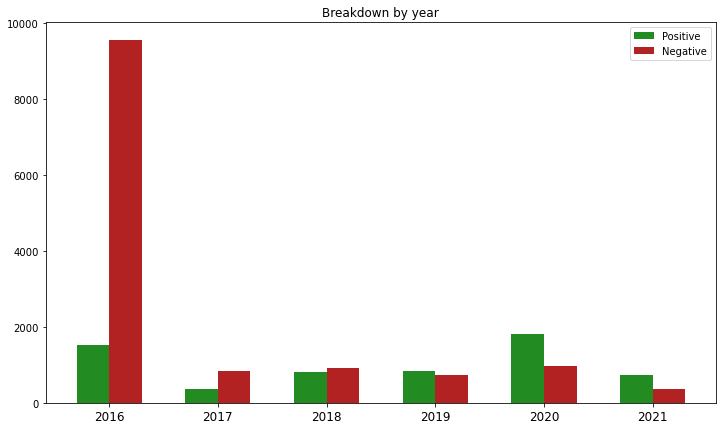

In [46]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, total_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, total_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [47]:
print(f"It's about even. Negative reviews at a total playing time of less than half a day are slightly over 4.000 less, but the overall percentage of negative reviews is about even ({round((review_negative_by_year[0]/sum(review_negative_by_year))*100,2)}% vs. {round((total_negative_by_year[0]/sum(total_negative_by_year))*100,2)}%).")

It's about even. Negative reviews at a total playing time of less than half a day are slightly over 4.000 less, but the overall percentage of negative reviews is about even (73.61% vs. 71.33%).


### How prolific were the reviewers on Steam?

In [48]:
more_than_10_reviews = mnsdata.loc[(mnsdata['Total Reviews'] >= 11)].count()[0]
between_6_and_10_reviews = mnsdata.loc[(mnsdata['Total Reviews'] >= 6) & (mnsdata['Total Reviews'] <= 10)].count()[0]
less_than_6_reviews = mnsdata.loc[(mnsdata['Total Reviews'] <= 5)].count()[0]

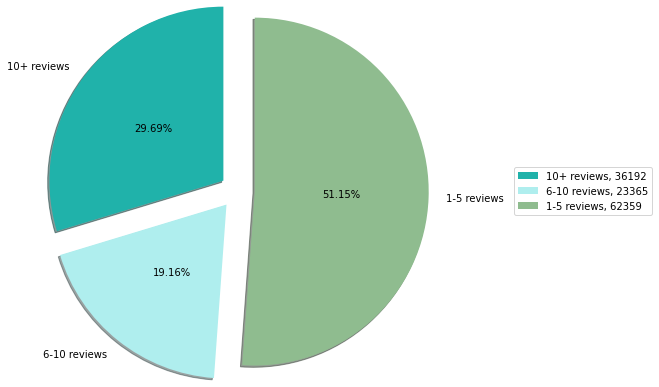

In [49]:
labels = ['10+ reviews', '6-10 reviews', '1-5 reviews']
sizes = [more_than_10_reviews, between_6_and_10_reviews, less_than_6_reviews]
color_set = ['lightseagreen', 'paleturquoise', 'darkseagreen']

explode = ([0.2, 0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

Slightly more than half of <i>No Man's Sky</i>'s reviewers contributed only up to five reviews on the Steam platform.

### How do the reviews break down by reviewer contributions?

In [50]:
more_than_10_reviews_positive = mnsdata.loc[(mnsdata['Total Reviews'] >= 11) & (mnsdata['Recommended?'] == True)].count()[0]
between_6_and_10_reviews_positive = mnsdata.loc[(mnsdata['Total Reviews'] >= 6) & (mnsdata['Total Reviews'] <= 10) & (mnsdata['Recommended?'] == True)].count()[0]
less_than_6_reviews_positive = mnsdata.loc[(mnsdata['Total Reviews'] <= 5) & (mnsdata['Recommended?'] == True)].count()[0]

more_than_10_reviews_negative = mnsdata.loc[(mnsdata['Total Reviews'] >= 11) & (mnsdata['Recommended?'] == False)].count()[0]
between_6_and_10_reviews_negative = mnsdata.loc[(mnsdata['Total Reviews'] >= 6) & (mnsdata['Total Reviews'] <= 10) & (mnsdata['Recommended?'] == False)].count()[0]
less_than_6_reviews_negative = mnsdata.loc[(mnsdata['Total Reviews'] <= 5) & (mnsdata['Recommended?'] == False)].count()[0]

reviewers_by_category_positive = [more_than_10_reviews_positive, between_6_and_10_reviews_positive, less_than_6_reviews_positive]
reviewers_by_category_negative = [more_than_10_reviews_negative, between_6_and_10_reviews_negative, less_than_6_reviews_negative]

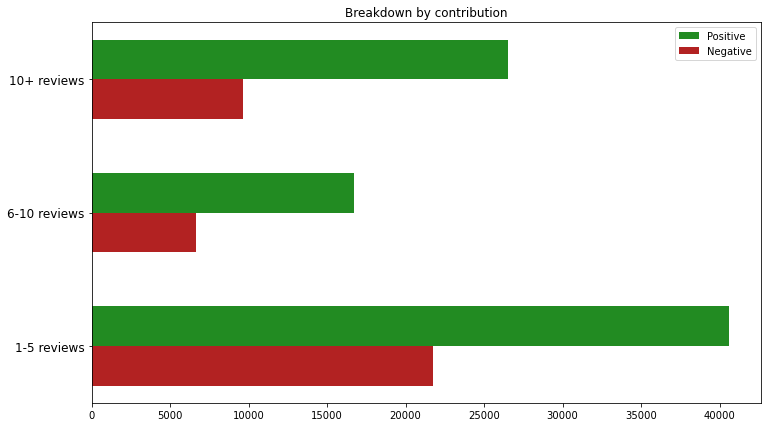

In [51]:
reviewers_categories = ('10+ reviews', '6-10 reviews', '1-5 reviews')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by contribution')
plt.barh(np.arange(len(reviewers_by_category_positive))+width/2, reviewers_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(reviewers_by_category_negative))-width/2, reviewers_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(reviewers_categories)-1,-1,-1), reviewers_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

It's actually about even across all categories. If there were reviewers who only reviewed negatively during launch, it was most likely matched by reviewers who only reviewed positive after multiple updates.

### How are the reviews broken down by reviewer contributions distributed on a yearly basis?

In [52]:
more_than_10_reviews_positive_by_year = [mnsdata.loc[(mnsdata['Total Reviews'] >= 11) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(16,22)]
more_than_10_reviews_negative_by_year = [mnsdata.loc[(mnsdata['Total Reviews'] >= 11) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(16,22)]

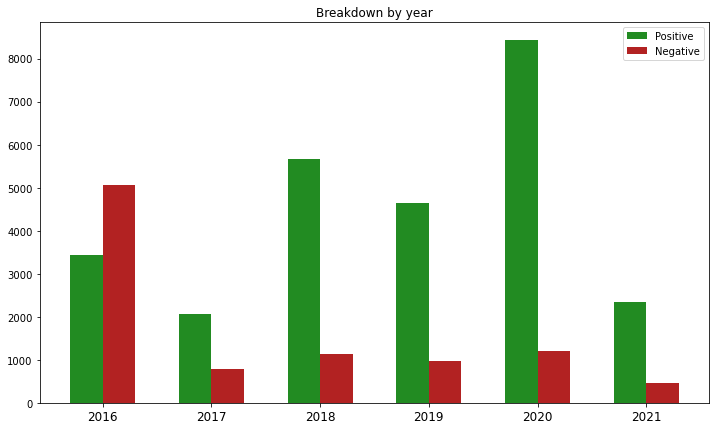

In [53]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, more_than_10_reviews_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, more_than_10_reviews_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [54]:
between_6_and_10_reviews_positive_by_year = [mnsdata.loc[(mnsdata['Total Reviews'] >= 6) & (mnsdata['Total Reviews'] <= 10) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(16,22)]
between_6_and_10_reviews_negative_by_year = [mnsdata.loc[(mnsdata['Total Reviews'] >= 6) & (mnsdata['Total Reviews'] <= 10) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(16,22)]

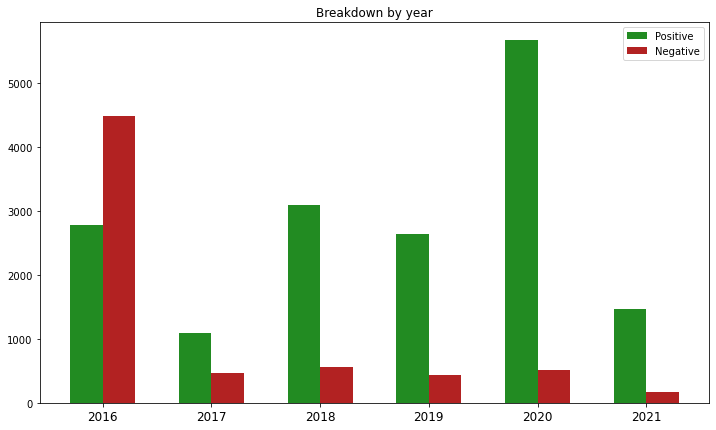

In [55]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, between_6_and_10_reviews_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, between_6_and_10_reviews_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [56]:
less_than_6_reviews_positive_by_year = [mnsdata.loc[(mnsdata['Total Reviews'] <= 5) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(16,22)]
less_than_6_reviews_negative_by_year = [mnsdata.loc[(mnsdata['Total Reviews'] <= 5) & (mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(16,22)]

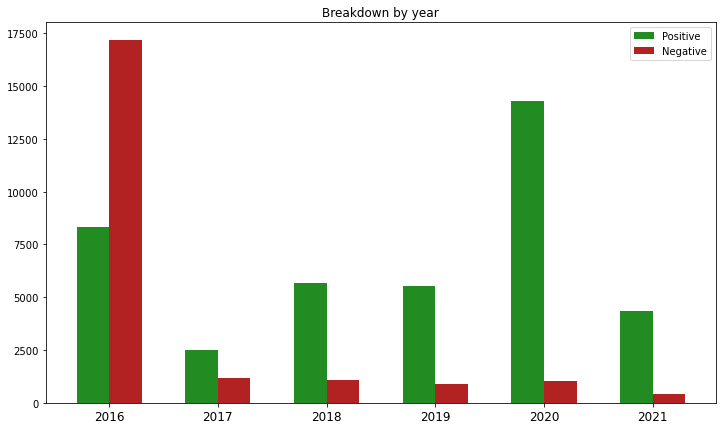

In [57]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, less_than_6_reviews_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, less_than_6_reviews_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

There are a few very noticable trends here:
- The amount of negative reviews in 2016 are inversely matched by the amount of positive reviews in 2020 by reviewers across all categories.
- Positive reviews generally are more numerous the more reviews a reviewer has.
- Negative reviews in 2016 by reviewers who have fewer reviews are the most numerous, followed by positive reviews in 2020 by reviewers who have fewer reviews.

### How huge are the reviewers' Steam libraries?

In [58]:
more_than_250_games = mnsdata.loc[(mnsdata['Games Owned'] >= 251)].count()[0]
between_100_to_250_games = mnsdata.loc[(mnsdata['Games Owned'] >= 100) & (mnsdata['Games Owned'] <= 250)].count()[0]
less_than_100_games = mnsdata.loc[(mnsdata['Games Owned'] <= 99)].count()[0]

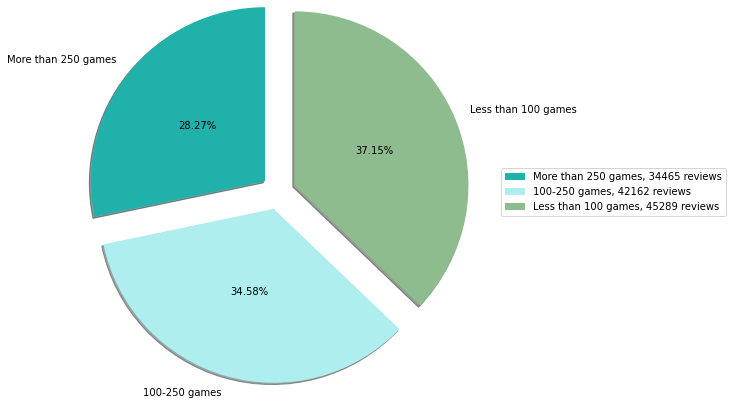

In [59]:
labels = ['More than 250 games', '100-250 games', 'Less than 100 games']
sizes = [more_than_250_games, between_100_to_250_games, less_than_100_games]
color_set = ['lightseagreen', 'paleturquoise', 'darkseagreen']

explode = ([0.2, 0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

Libraries with less than 100 games have a slight majority over the others.

### How do the reviews break down by library size?

In [60]:
more_than_250_games_positive = mnsdata.loc[(mnsdata['Games Owned'] >= 251) & (mnsdata['Recommended?'] == True)].count()[0]
between_100_to_250_games_positive = mnsdata.loc[(mnsdata['Games Owned'] >= 100) & (mnsdata['Games Owned'] <= 250) & (mnsdata['Recommended?'] == True)].count()[0]
less_than_100_games_positive = mnsdata.loc[(mnsdata['Games Owned'] <= 99) & (mnsdata['Recommended?'] == True)].count()[0]

more_than_250_games_negative = mnsdata.loc[(mnsdata['Games Owned'] >= 251) & (mnsdata['Recommended?'] == False)].count()[0]
between_100_to_250_games_negative = mnsdata.loc[(mnsdata['Games Owned'] >= 100) & (mnsdata['Games Owned'] <= 250) & (mnsdata['Recommended?'] == False)].count()[0]
less_than_100_games_negative = mnsdata.loc[(mnsdata['Games Owned'] <= 99) & (mnsdata['Recommended?'] == False)].count()[0]

libraries_by_category_positive = [more_than_250_games_positive, between_100_to_250_games_positive, less_than_100_games_positive]
libraries_by_category_negative = [more_than_250_games_negative, between_100_to_250_games_negative, less_than_100_games_negative]

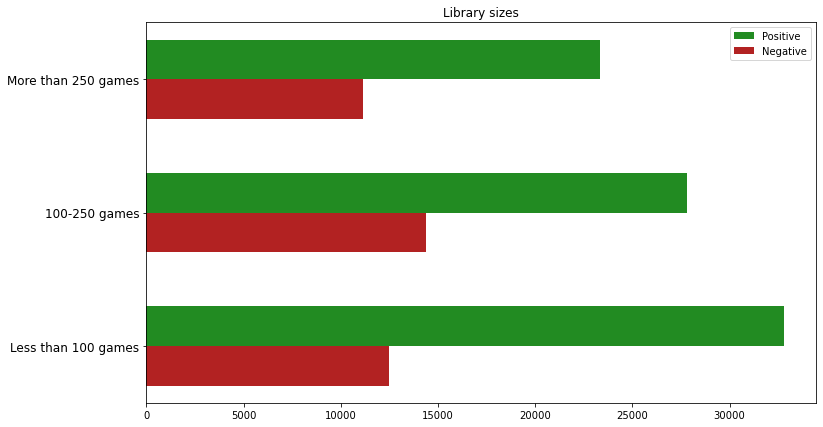

In [61]:
libraries_categories = ('More than 250 games', '100-250 games', 'Less than 100 games')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Library sizes')
plt.barh(np.arange(len(libraries_by_category_positive))+width/2, libraries_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(libraries_by_category_negative))-width/2, libraries_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(libraries_categories)-1,-1,-1), libraries_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [62]:
print(f'More than 250 games: {round(more_than_250_games_positive/(more_than_250_games_positive+more_than_250_games_negative)*100,2)}%')
print(f'Between 100 and 250 games: {round(between_100_to_250_games_positive/(between_100_to_250_games_positive+between_100_to_250_games_negative)*100,2)}%')
print(f'Less than 100 games: {round(less_than_100_games_positive/(less_than_100_games_positive+less_than_100_games_negative)*100,2)}%')

More than 250 games: 67.67%
Between 100 and 250 games: 65.92%
Less than 100 games: 72.43%


It's largely even but with a slightly more positive preference by reviewers whose libraries have less than 100 games.

### How are the reviews broken down by library sizes distributed on a yearly basis?

In [63]:
more_than_250_games_positive_by_year = [mnsdata.loc[(mnsdata['Games Owned'] >= 251) & (mnsdata['Recommended?'] == True) & (mnsdata['Yearly'] == f'20{i}')].count()[0] for i in range(16,22)]
more_than_250_games_negative_by_year = [mnsdata.loc[(mnsdata['Games Owned'] >= 251) & (mnsdata['Recommended?'] == False) & (mnsdata['Yearly'] == f'20{i}')].count()[0] for i in range(16,22)]

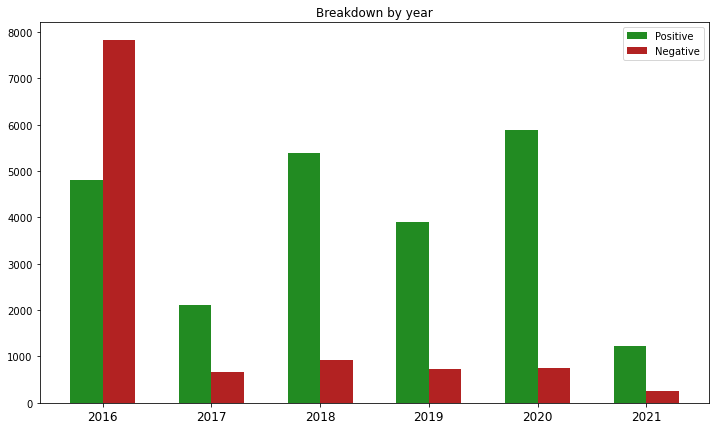

In [64]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, more_than_250_games_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, more_than_250_games_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [65]:
between_100_to_250_games_positive_by_year = [mnsdata.loc[(mnsdata['Games Owned'] >= 100) & (mnsdata['Games Owned'] <= 250) & (mnsdata['Recommended?'] == True) & (mnsdata['Yearly'] == f'20{i}')].count()[0] for i in range(16,22)]
between_100_to_250_games_negative_by_year = [mnsdata.loc[(mnsdata['Games Owned'] >= 100) & (mnsdata['Games Owned'] <= 250) & (mnsdata['Recommended?'] == False) & (mnsdata['Yearly'] == f'20{i}')].count()[0] for i in range(16,22)]

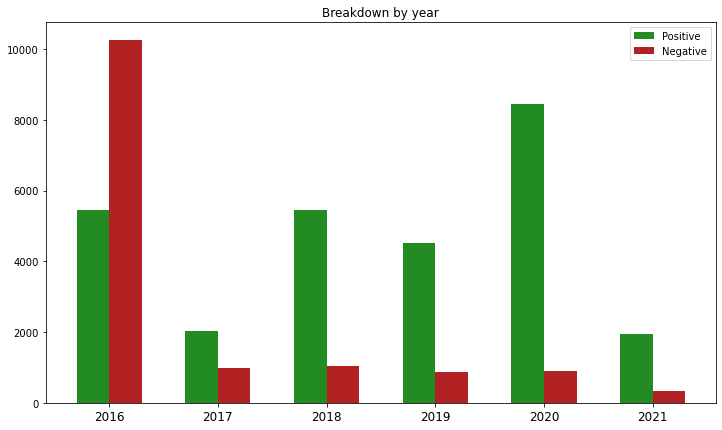

In [66]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, between_100_to_250_games_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, between_100_to_250_games_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [67]:
less_than_100_games_positive_by_year = [mnsdata.loc[(mnsdata['Games Owned'] <= 99) & (mnsdata['Recommended?'] == True) & (mnsdata['Yearly'] == f'20{i}')].count()[0] for i in range(16,22)]
less_than_100_games_negative_by_year = [mnsdata.loc[(mnsdata['Games Owned'] <= 99) & (mnsdata['Recommended?'] == False) & (mnsdata['Yearly'] == f'20{i}')].count()[0] for i in range(16,22)]

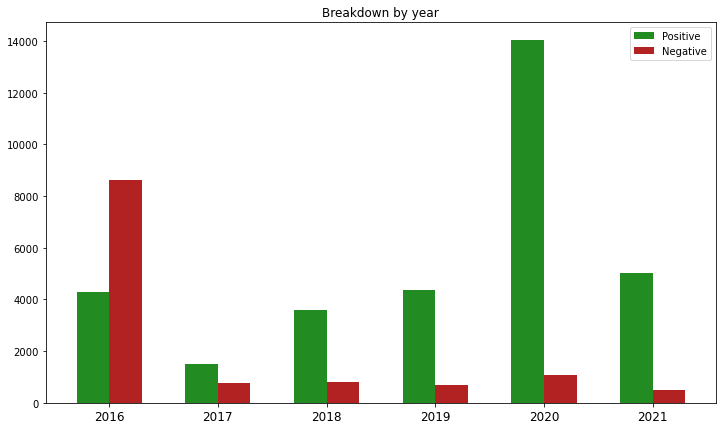

In [68]:
years = ('2016', '2017', '2018', '2019', '2020', '2021')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Breakdown by year')
plt.bar(np.arange(len(years))-width/2, less_than_100_games_positive_by_year, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(years))+width/2, less_than_100_games_negative_by_year, width, label='Negative', color='firebrick')
plt.xticks(range(len(years)), years, rotation='horizontal', size=12)

plt.legend()

plt.show()

There are a few very noticable trends here:
- Negative reviews in 2016 amongst all reviewers remains high regardless of library size.
- Positive reviews in 2020 are generally high, with the reviewers whose libraries are under 100 games are the highest.
- Reviews in 2019 look similar across all library sizes. 

### What are No Man's Sky's yearly ratings?

In [69]:
yearly_positives = [mnsdata.loc[(mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(16,22)]
yearly_negatives = [mnsdata.loc[(mnsdata['Yearly'] == f'20{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(16,22)]
    
yearly_ratings = [yearly_positives[i]/(yearly_positives[i]+yearly_negatives[i]) for i in range(len(yearly_positives))]

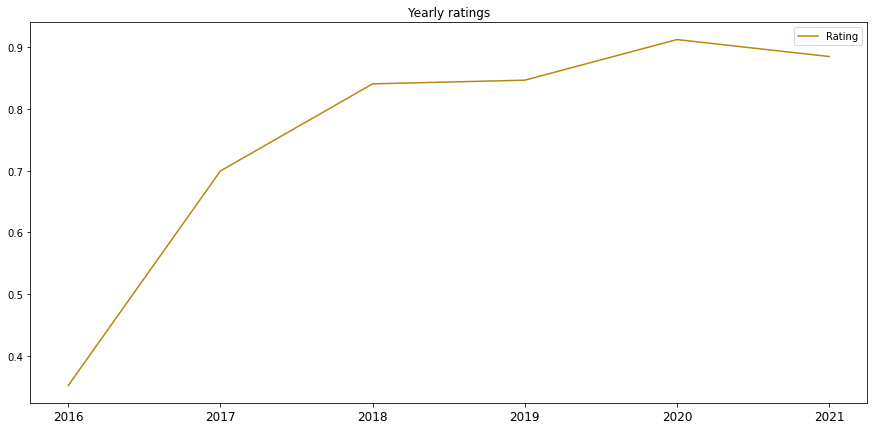

In [70]:
all_years = ('2016', '2017', '2018', '2019', '2020', '2021')

plt.figure(figsize=(15,7))

plt.title('Yearly ratings')
plt.plot(np.arange(len(all_years)), yearly_ratings, label='Rating', color='darkgoldenrod')
plt.xticks(range(len(all_years)), all_years, rotation='horizontal', size=12)

plt.legend()

plt.show()

After its disastrous launch, <i>No Man's Sky</i> made a massive comeback starting with the <i>Foundation</i> and <i>Pathfinder</i> updates and doubled their rating by the next year. <i>No Man's Sky</i> took another step forward with the release of the <i>Atlas Rises</i> and <i>NEXT</i> updates.

### What are No Man's Sky's monthly ratings?

In [71]:
monthly_2016_positives = [mnsdata.loc[(mnsdata['Monthly'] == f'20160{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(8,10)]
monthly_2016_negatives = [mnsdata.loc[(mnsdata['Monthly'] == f'20160{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(8,10)]

for i in range(10, 13):
    monthly_2016_positives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2016{i}') & (mnsdata['Recommended?'] == True)].count()[0])
    monthly_2016_negatives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2016{i}') & (mnsdata['Recommended?'] == False)].count()[0])
    
monthly_2016_ratings = [monthly_2016_positives[i]/(monthly_2016_positives[i]+monthly_2016_negatives[i]) for i in range(5)]

In [72]:
monthly_2017_positives = [mnsdata.loc[(mnsdata['Monthly'] == f'20170{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(1,10)]
monthly_2017_negatives = [mnsdata.loc[(mnsdata['Monthly'] == f'20170{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(1,10)]

for i in range(10, 13):
    monthly_2017_positives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2017{i}') & (mnsdata['Recommended?'] == True)].count()[0])
    monthly_2017_negatives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2017{i}') & (mnsdata['Recommended?'] == False)].count()[0])
    
monthly_2017_ratings = [monthly_2017_positives[i]/(monthly_2017_positives[i]+monthly_2017_negatives[i]) for i in range(12)]

In [73]:
monthly_2018_positives = [mnsdata.loc[(mnsdata['Monthly'] == f'20180{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(1,10)]
monthly_2018_negatives = [mnsdata.loc[(mnsdata['Monthly'] == f'20180{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(1,10)]

for i in range(10, 13):
    monthly_2018_positives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2018{i}') & (mnsdata['Recommended?'] == True)].count()[0])
    monthly_2018_negatives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2018{i}') & (mnsdata['Recommended?'] == False)].count()[0])
    
monthly_2018_ratings = [monthly_2018_positives[i]/(monthly_2018_positives[i]+monthly_2018_negatives[i]) for i in range(12)]

In [74]:
monthly_2019_positives = [mnsdata.loc[(mnsdata['Monthly'] == f'20190{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(1,10)]
monthly_2019_negatives = [mnsdata.loc[(mnsdata['Monthly'] == f'20190{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(1,10)]

for i in range(10, 13):
    monthly_2019_positives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2019{i}') & (mnsdata['Recommended?'] == True)].count()[0])
    monthly_2019_negatives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2019{i}') & (mnsdata['Recommended?'] == False)].count()[0])
    
monthly_2019_ratings = [monthly_2019_positives[i]/(monthly_2019_positives[i]+monthly_2019_negatives[i]) for i in range(12)]

In [75]:
monthly_2020_positives = [mnsdata.loc[(mnsdata['Monthly'] == f'20200{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(1,10)]
monthly_2020_negatives = [mnsdata.loc[(mnsdata['Monthly'] == f'20200{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(1,10)]

for i in range(10, 13):
    monthly_2020_positives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2020{i}') & (mnsdata['Recommended?'] == True)].count()[0])
    monthly_2020_negatives.append(mnsdata.loc[(mnsdata['Monthly'] == f'2020{i}') & (mnsdata['Recommended?'] == False)].count()[0])
    
monthly_2020_ratings = [monthly_2020_positives[i]/(monthly_2020_positives[i]+monthly_2020_negatives[i]) for i in range(12)]

In [76]:
monthly_2021_positives = [mnsdata.loc[(mnsdata['Monthly'] == f'20210{i}') & (mnsdata['Recommended?'] == True)].count()[0] for i in range(1,6)]
monthly_2021_negatives = [mnsdata.loc[(mnsdata['Monthly'] == f'20210{i}') & (mnsdata['Recommended?'] == False)].count()[0] for i in range(1,6)]
    
monthly_2021_ratings = [monthly_2021_positives[i]/(monthly_2021_positives[i]+monthly_2021_negatives[i]) for i in range(5)]

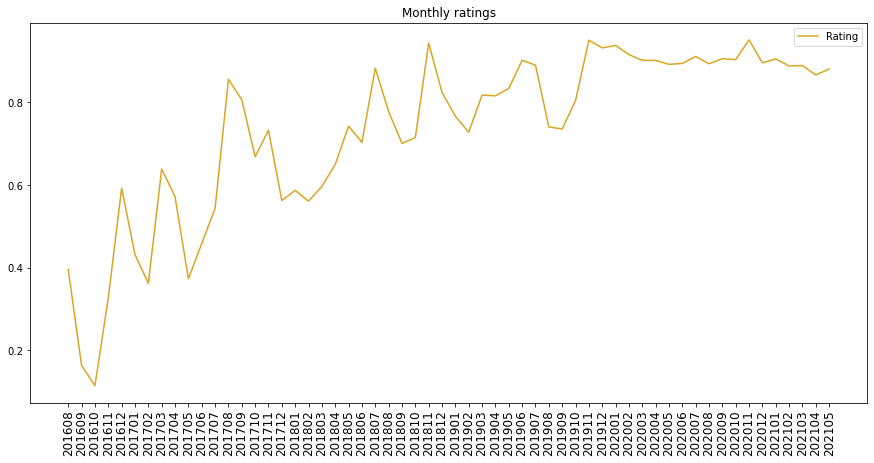

In [77]:
monthly_ratings = monthly_2016_ratings + monthly_2017_ratings + monthly_2018_ratings + monthly_2019_ratings + monthly_2020_ratings + monthly_2021_ratings

plt.figure(figsize=(15,7))

plt.title('Monthly ratings')
plt.plot(np.arange(len(monthly_ratings)), monthly_ratings, label='Rating', color='goldenrod')
plt.xticks(range(len(monthly_ratings)), mnsdata['Monthly'].unique()[::-1], rotation='vertical', size=12)

plt.legend()

plt.show()

The comeback started after <i>No Man's Sky</i> hit rock bottom in October 2016 when its monthly rating was only <b>11%</b>. The following month, <i>Hello Games</i> began releasing a series of updates that turned the public opinion of the game around. Spikes in positive reviews generally happened when a new update came out, and some were more noticable than others. The following link has all the updates dated:

https://nomanssky.fandom.com/wiki/Patch_notes

Looking at the patch notes, the jumps in positive reviews happened during:

- December 2016 (Foundation)
- March 2017 (Pathfinder)
- August 2017 (Atlas Rises)
- July 2018 (NEXT)
- November 2018 (Abyss)
- Summer 2019 (Steam sale)
- November 2019 (Synthesis)

<i>No Man's Sky</i>'s monthly reviews have been consistently positive since the middle of 2017, and monthly reviews have been consistently over <b>80%</b> positive since late 2019.

Now! Let's look at <i>No Man's Sky</i> from its initial launch.

### How were the reviews when the game first launched?

In [78]:
first_day_positive = mnsdata.loc[(mnsdata['Date'] == '2016-08-12') & (mnsdata['Recommended?'] == True)].count()[0]
first_day_negative = mnsdata.loc[(mnsdata['Date'] == '2016-08-12') & (mnsdata['Recommended?'] == False)].count()[0]

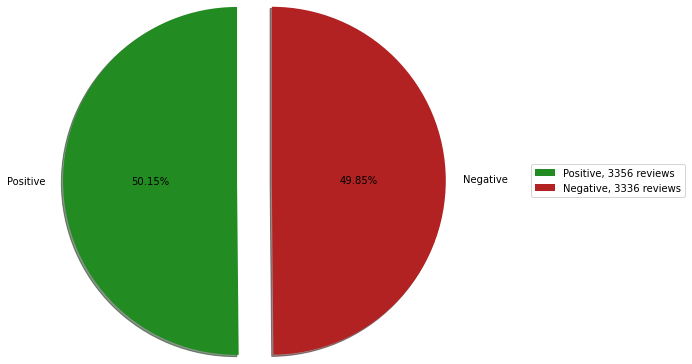

In [79]:
labels = ['Positive', 'Negative']
sizes = [first_day_positive, first_day_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

Launch day reviews? It was right down the middle! Positive reviews had a 20 review lead over negative reviews.

In [80]:
first_week_positive = mnsdata.loc[(mnsdata['Date'] <= '2016-08-18') & (mnsdata['Recommended?'] == True)].count()[0]
first_week_negative = mnsdata.loc[(mnsdata['Date'] <= '2016-08-18') & (mnsdata['Recommended?'] == False)].count()[0]

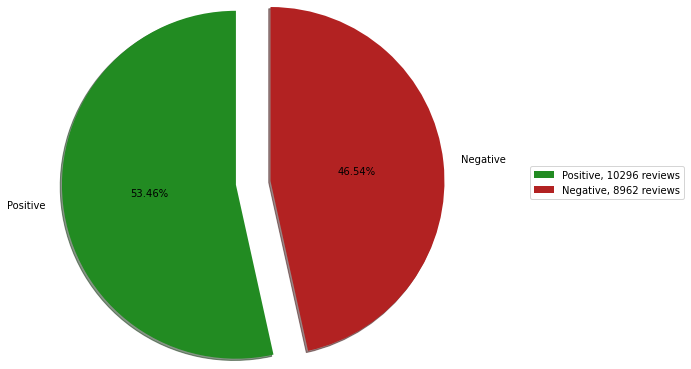

In [81]:
labels = ['Positive', 'Negative']
sizes = [first_week_positive, first_week_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

Launch week reviews? Positive ratings now have a <b>7%</b> lead after picking up 13.000 more positive reviews than negative reviews.

In [82]:
first_month_positive = mnsdata.loc[(mnsdata['Date'] <= '2016-08-31') & (mnsdata['Recommended?'] == True)].count()[0]
first_month_negative = mnsdata.loc[(mnsdata['Date'] <= '2016-08-31') & (mnsdata['Recommended?'] == False)].count()[0]

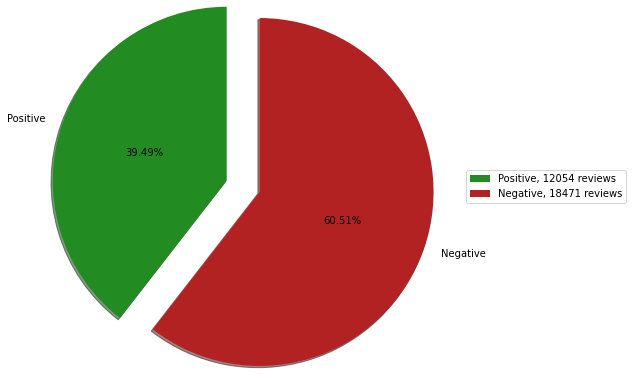

In [83]:
labels = ['Positive', 'Negative']
sizes = [first_month_positive, first_month_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

But this would not last. The negative word-of-mouth around <i>No Man's Sky</i> fanned like wildfire, and by the end of launch month, the game's ratings fell below <b>40%</b> after only picking up 1.200 new positive reviews compared to over <b>10.000</b> new negative reviews!

### How were the reviews before the Foundation patch?

In [84]:
post_release_positives_overall = mnsdata.loc[(mnsdata['Date'] <= '2016-11-25') & (mnsdata['Recommended?'] == True)].count()[0]
post_release_negatives_overall = mnsdata.loc[(mnsdata['Date'] <= '2016-11-25') & (mnsdata['Recommended?'] == False)].count()[0]

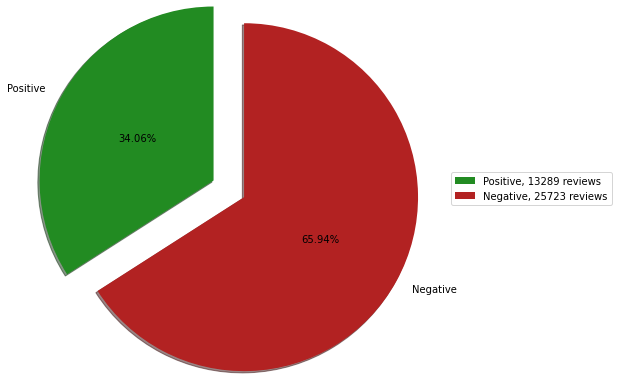

In [85]:
labels = ['Positive', 'Negative']
sizes = [post_release_positives_overall, post_release_negatives_overall]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

Negative reviews continued to pile on. <i>No Man's Sky</i> added another 1.200 new positive reviews compared to over <b>7.000</b> more negative reviews.

### How were the reviews before the Foundation patch broken down by months?

In [86]:
september_2016_positive = mnsdata.loc[(mnsdata['Monthly'] == '201609') & (mnsdata['Recommended?'] == True)].count()[0]
september_2016_negative = mnsdata.loc[(mnsdata['Monthly'] == '201609') & (mnsdata['Recommended?'] == False)].count()[0]

october_2016_positive = mnsdata.loc[(mnsdata['Monthly'] == '201610') & (mnsdata['Recommended?'] == True)].count()[0]
october_2016_negative = mnsdata.loc[(mnsdata['Monthly'] == '201610') & (mnsdata['Recommended?'] == False)].count()[0]

november_2016_positive = mnsdata.loc[(mnsdata['Date'] >= '2016-11-01') & (mnsdata['Date'] <= '2016-11-25') & (mnsdata['Recommended?'] == True)].count()[0]
november_2016_negative = mnsdata.loc[(mnsdata['Date'] >= '2016-11-01') & (mnsdata['Date'] <= '2016-11-25') & (mnsdata['Recommended?'] == False)].count()[0]

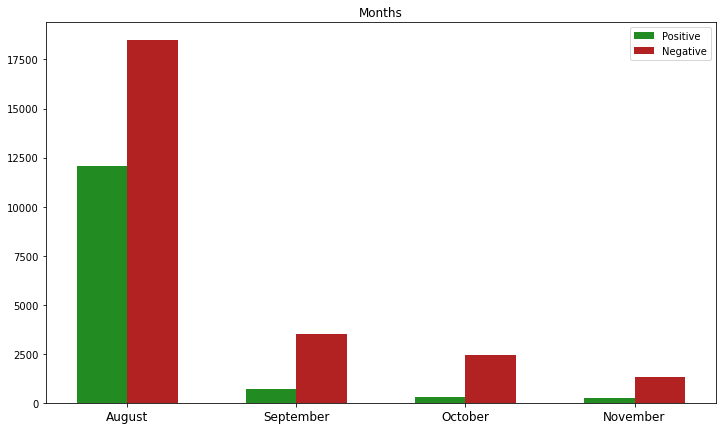

In [87]:
post_release_positives_monthly = [first_month_positive, september_2016_positive, october_2016_positive, november_2016_positive]
post_release_negatives_monthly = [first_month_negative, september_2016_negative, october_2016_negative, november_2016_negative]

post_release_months = ('August', 'September', 'October', 'November')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Months')
plt.bar(np.arange(len(post_release_months))-width/2, post_release_positives_monthly, width, label='Positive', color='forestgreen')
plt.bar(np.arange(len(post_release_months))+width/2, post_release_negatives_monthly, width, label='Negative', color='firebrick')
plt.xticks(range(len(post_release_months)), post_release_months, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [88]:
print(f'August: {round((post_release_positives_monthly[0]/(post_release_positives_monthly[0]+post_release_negatives_monthly[0]))*100,2)}%')
print(f'September: {round((post_release_positives_monthly[1]/(post_release_positives_monthly[1]+post_release_negatives_monthly[1]))*100,2)}%')
print(f'October: {round((post_release_positives_monthly[2]/(post_release_positives_monthly[2]+post_release_negatives_monthly[2]))*100,2)}%')
print(f'(Most of) November: {round((post_release_positives_monthly[3]/(post_release_positives_monthly[3]+post_release_negatives_monthly[3]))*100,2)}%')

August: 39.49%
September: 16.34%
October: 11.43%
(Most of) November: 15.19%


The negative reviews piled up as players revolted after feeling being misled on the features and functionalities of the game compared to what was promised. After very little communication from <i>Hello Games</i> over the direction of the future of <i>No Man's Sky</i>, the player base cratered by October.

https://www.extremetech.com/gaming/236216-no-ones-playing-no-mans-sky-as-developer-remains-silent-and-players-flee-the-franchise
https://gearnuke.com/no-mans-sky-multiplayer-no-visible-players/

Negative reviews would massively outnumber positive reviews until the release of the <i>Foundation</i> patch.

### How were the reviews after the release of the Foundation patch?

In [89]:
foundation_positive = mnsdata.loc[(mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2017-03-07') & (mnsdata['Recommended?'] == True)].count()[0]
foundation_negative = mnsdata.loc[(mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2017-03-07') & (mnsdata['Recommended?'] == False)].count()[0]

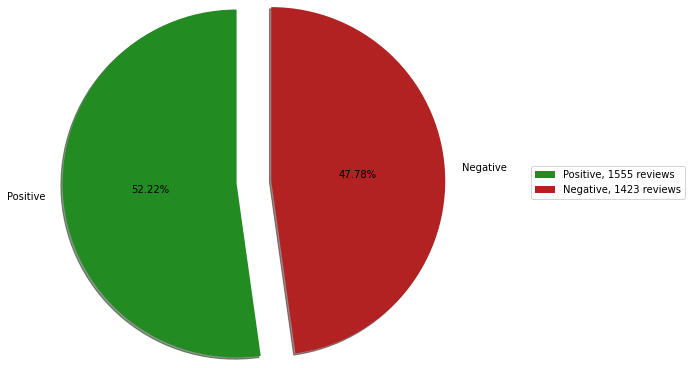

In [90]:
labels = ['Positive', 'Negative']
sizes = [foundation_positive, foundation_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.75, 0.5), loc='center left')

plt.show()

The reception was really mixed but was slightly more positive than negative.

The critics were also pleased with the new update, noting <i>Hello Games</i> has taken a very important step to right many of the wrongs after <i>No Man's Sky</i>'s initial release. 

https://www.forbes.com/sites/insertcoin/2016/11/27/the-no-mans-sky-foundation-update-is-live-and-actually-looks-rather-fantastic/?sh=5177f8ad76b5

### How were the reviews after the release of the Foundation patch broken down by playing time?

In [91]:
foundation_avg_time = mnsdata.loc[(mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2017-03-07')]['Review Playing Time'].mean()
print(foundation_avg_time)

2060.3992612491606


In [92]:
foundation_positive_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= foundation_avg_time) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2017-03-07') & (mnsdata['Recommended?'] == True)].count()[0]
foundation_negative_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= foundation_avg_time) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2017-03-07') & (mnsdata['Recommended?'] == False)].count()[0]

foundation_positive_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= foundation_avg_time) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2017-03-07') & (mnsdata['Recommended?'] == True)].count()[0]
foundation_negative_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= foundation_avg_time) & (mnsdata['Date'] >= '2016-11-26') & (mnsdata['Date'] <= '2017-03-07') & (mnsdata['Recommended?'] == False)].count()[0]

foundation_by_category_positive = [foundation_positive_above_avg, foundation_positive_below_avg]
foundation_by_category_negative = [foundation_negative_above_avg, foundation_negative_below_avg]

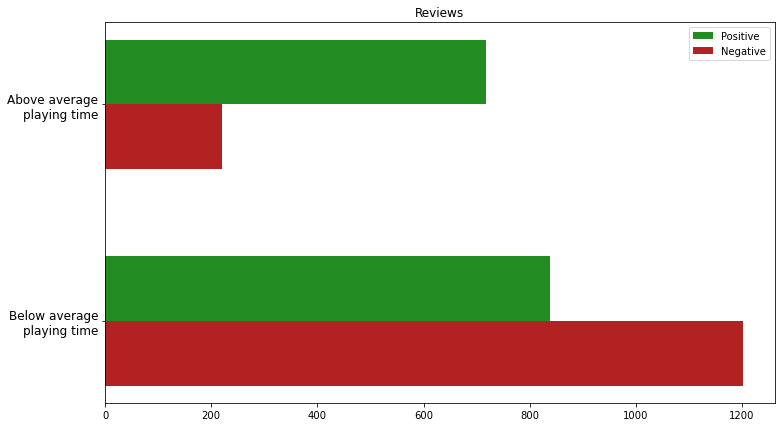

In [93]:
review_playingtime_categories = ('Above average\nplaying time', 'Below average\nplaying time')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, foundation_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, foundation_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

The average playing time at review was about 34.333 hours, and there was definitely a stark contrast on the reviews.

While there were slightly more positive reviews below average playing time at review than above it, it was not even close for negative reviews: The reviews below average playing time outnumbered the reviews above average playing time at nearly <b>six</b> times as much.

### How were the reviews after the release of the Pathfinder patch?

In [94]:
pathfinder_positive = mnsdata.loc[(mnsdata['Date'] >= '2017-03-08') & (mnsdata['Date'] <= '2017-08-10') & (mnsdata['Recommended?'] == True)].count()[0]
pathfinder_negative = mnsdata.loc[(mnsdata['Date'] >= '2017-03-08') & (mnsdata['Date'] <= '2017-08-10') & (mnsdata['Recommended?'] == False)].count()[0]

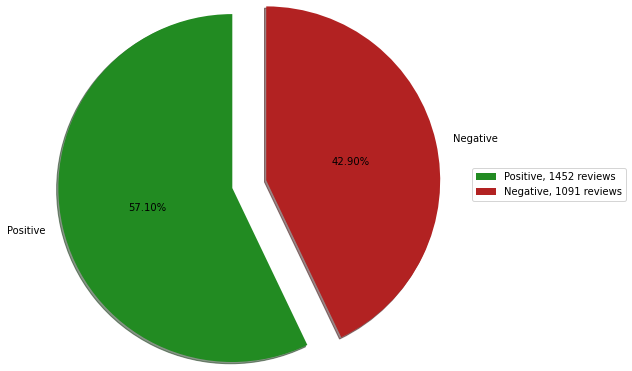

In [95]:
labels = ['Positive', 'Negative']
sizes = [pathfinder_positive, pathfinder_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

The reception was mixed, but it was more positive than it has ever been.

The critics noted the new features and improvements were much needed but still not enough for others to go out of their way to get it.

https://www.engadget.com/2017-03-08-no-mans-sky-path-finder-update.html

### How were the reviews after the release of the Pathfinder patch broken down by playing time?

In [96]:
pathfinder_avg_time = mnsdata.loc[(mnsdata['Date'] >= '2017-03-08') & (mnsdata['Date'] <= '2017-08-10')]['Review Playing Time'].mean()
print(pathfinder_avg_time)

2696.990955564294


In [97]:
pathfinder_positive_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= pathfinder_avg_time) & (mnsdata['Date'] >= '2017-03-08') & (mnsdata['Date'] <= '2017-08-10') & (mnsdata['Recommended?'] == True)].count()[0]
pathfinder_negative_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= pathfinder_avg_time) & (mnsdata['Date'] >= '2017-03-08') & (mnsdata['Date'] <= '2017-08-10') & (mnsdata['Recommended?'] == False)].count()[0]

pathfinder_positive_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= pathfinder_avg_time) & (mnsdata['Date'] >= '2017-03-08') & (mnsdata['Date'] <= '2017-08-10') & (mnsdata['Recommended?'] == True)].count()[0]
pathfinder_negative_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= pathfinder_avg_time) & (mnsdata['Date'] >= '2017-03-08') & (mnsdata['Date'] <= '2017-08-10') & (mnsdata['Recommended?'] == False)].count()[0]

pathfinder_by_category_positive = [pathfinder_positive_above_avg, pathfinder_positive_below_avg]
pathfinder_by_category_negative = [pathfinder_negative_above_avg, pathfinder_negative_below_avg]

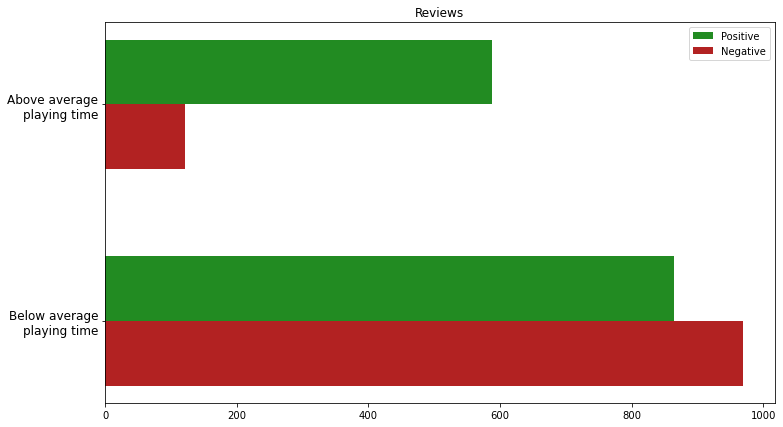

In [98]:
review_playingtime_categories = ('Above average\nplaying time', 'Below average\nplaying time')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, pathfinder_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, pathfinder_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

The average playing time at review increased by about 10 hours with this update, and while those who played for more than 44 hours were positive of the game, those who played less than that were starting to be more evenly divided about how they felt about the game.

### How were the reviews after the release of the Atlas Rises patch?

In [99]:
atlasrises_positive = mnsdata.loc[(mnsdata['Date'] >= '2017-08-11') & (mnsdata['Date'] <= '2018-07-23') & (mnsdata['Recommended?'] == True)].count()[0]
atlasrises_negative = mnsdata.loc[(mnsdata['Date'] >= '2017-08-11') & (mnsdata['Date'] <= '2018-07-23') & (mnsdata['Recommended?'] == False)].count()[0]

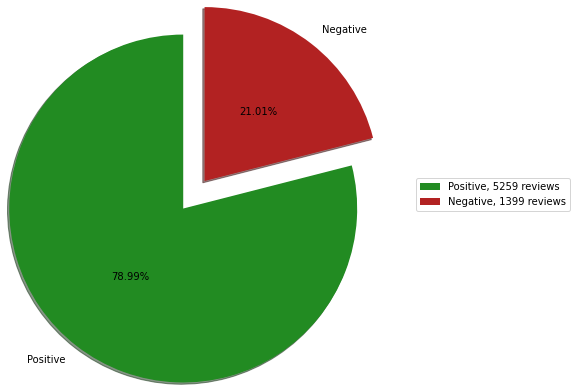

In [100]:
labels = ['Positive', 'Negative']
sizes = [atlasrises_positive, atlasrises_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

The reception was much more positive and the reviewers gave the game a very positive mark overall.

The critics were happy <i>Hello Games</i> introduced an expanded storyline, but they felt it was weighted down by uninteresting space missions. While there were numerous changes for the better, there were also just as numerous shortcomings. The <i>Atlas Rises</i> update showed <i>Hello Games</i> was serious about the <i>No Man's Sky</i>'s future, but it still needed a bit more to go.

https://www.gq-magazine.co.uk/article/no-mans-sky-atlas-rises-review

### How were the reviews after the release of the Atlas Rises patch broken down by playing time?

In [101]:
atlasrises_avg_time = mnsdata.loc[(mnsdata['Date'] >= '2017-08-11') & (mnsdata['Date'] <= '2018-07-23')]['Review Playing Time'].mean()
print(atlasrises_avg_time)

3377.543406428357


In [102]:
atlasrises_positive_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= atlasrises_avg_time) & (mnsdata['Date'] >= '2017-08-11') & (mnsdata['Date'] <= '2018-07-23') & (mnsdata['Recommended?'] == True)].count()[0]
atlasrises_negative_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= atlasrises_avg_time) & (mnsdata['Date'] >= '2017-08-11') & (mnsdata['Date'] <= '2018-07-23') & (mnsdata['Recommended?'] == False)].count()[0]

atlasrises_positive_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= atlasrises_avg_time) & (mnsdata['Date'] >= '2017-08-11') & (mnsdata['Date'] <= '2018-07-23') & (mnsdata['Recommended?'] == True)].count()[0]
atlasrises_negative_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= atlasrises_avg_time) & (mnsdata['Date'] >= '2017-08-11') & (mnsdata['Date'] <= '2018-07-23') & (mnsdata['Recommended?'] == False)].count()[0]

atlasrises_by_category_positive = [atlasrises_positive_above_avg, atlasrises_positive_below_avg]
atlasrises_by_category_negative = [atlasrises_negative_above_avg, atlasrises_negative_below_avg]

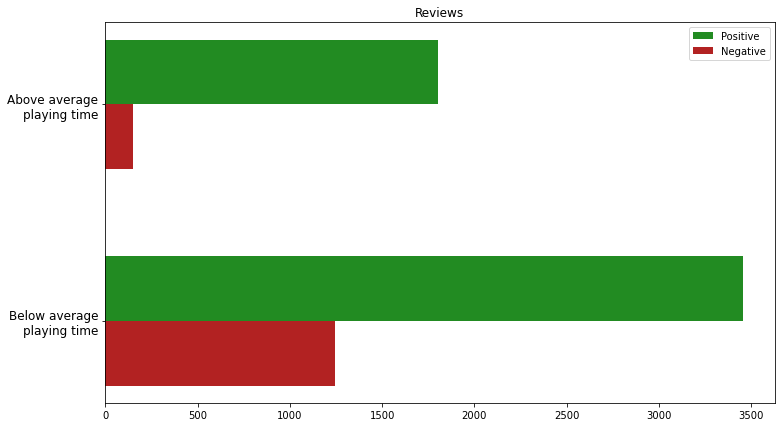

In [103]:
review_playingtime_categories = ('Above average\nplaying time', 'Below average\nplaying time')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, atlasrises_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, atlasrises_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

With an average playing time at review sitting at over 56 hours, the average time increased by another 12 hours from the <i>Pathfinder</i> patch. Unlike the last update where reviewers who reviewed below the average playing time were mixed about the game, reviewers were largely positive overall.

### How were the reviews after the release of the NEXT patch?

In [104]:
next_positive = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True)].count()[0]
next_negative = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == False)].count()[0]

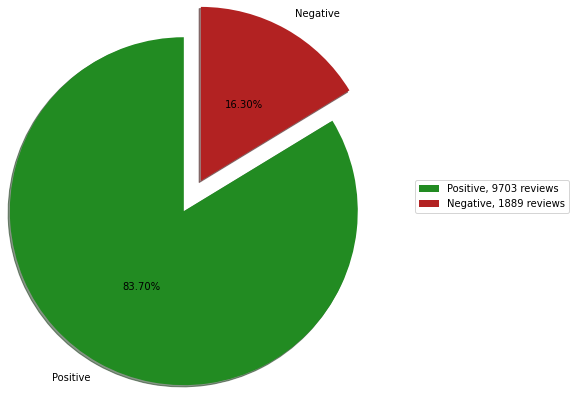

In [105]:
labels = ['Positive', 'Negative']
sizes = [next_positive, next_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

The reception was even more positive and eight out of ten reviewers gave the game their approval.

The critics were pleased with the launch of a multiplayer mode but were disappointed with how buggy it was. They were also still dismayed with the resource-mining mechanic for being the same process but in different shades and the combat system for being not well-designed. The game was still sluggish overall.

https://www.ign.com/articles/2018/07/31/no-mans-sky-next-review

### How were the reviews after the release of the NEXT patch broken down by playing time?

In [106]:
next_avg_time = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28')]['Review Playing Time'].mean()
print(next_avg_time)

3368.017943409248


In [107]:
next_positive_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= next_avg_time) & (mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True)].count()[0]
next_negative_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= next_avg_time) & (mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == False)].count()[0]

next_positive_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= next_avg_time) & (mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True)].count()[0]
next_negative_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= next_avg_time) & (mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == False)].count()[0]

next_by_category_positive = [next_positive_above_avg, next_positive_below_avg]
next_by_category_negative = [next_negative_above_avg, next_negative_below_avg]

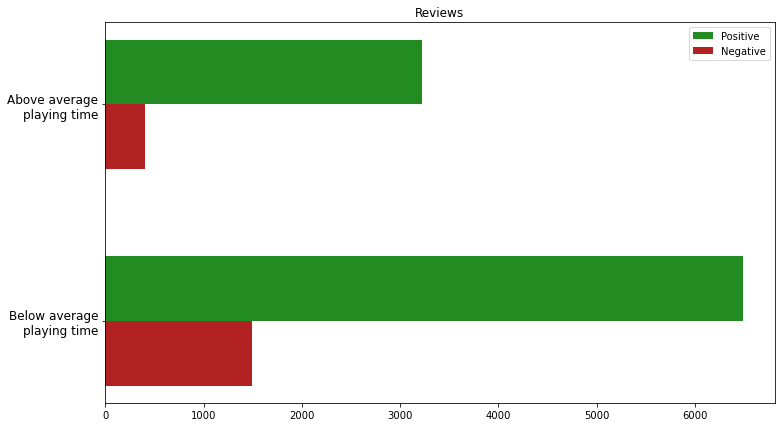

In [108]:
review_playingtime_categories = ('Above average\nplaying time', 'Below average\nplaying time')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, next_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, next_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

With an average playing time at review also sitting at over 56 hours, the average time is level with the <i>Atlas Rises</i> patch. The positive ratings for those reviewing at below average playing time continue to increase.

### How were the reviews after the release of the Abyss patch?

In [109]:
abyss_positive = mnsdata.loc[(mnsdata['Date'] >= '2018-10-29') & (mnsdata['Date'] <= '2018-11-21') & (mnsdata['Recommended?'] == True)].count()[0]
abyss_negative = mnsdata.loc[(mnsdata['Date'] >= '2018-10-29') & (mnsdata['Date'] <= '2018-11-21') & (mnsdata['Recommended?'] == False)].count()[0]

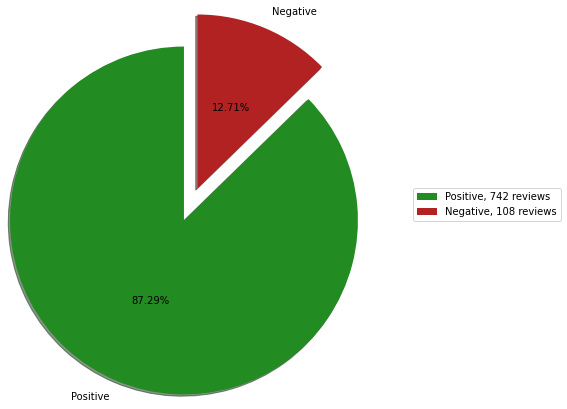

In [110]:
labels = ['Positive', 'Negative']
sizes = [abyss_positive, abyss_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

The reception was overwhelmingly positive and nearly nine out of ten reviewers gave the game a thumbs up.

The critics felt the <i>Abyss</i> update was not just a cheap Halloween-themed cash grab as it included a series of additions that made underwater terrain exploration meaningful in the form of new ships, a new storyline, and a much darker narration.

https://screenrant.com/no-mans-sky-abyss-update-details/

### How were the reviews after the release of the Abyss patch broken down by playing time?

In [111]:
abyss_avg_time = mnsdata.loc[(mnsdata['Date'] >= '2018-10-29') & (mnsdata['Date'] <= '2018-11-21')]['Review Playing Time'].mean()
print(abyss_avg_time)

5634.2988235294115


In [112]:
abyss_positive_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= abyss_avg_time) & (mnsdata['Date'] >= '2018-10-29') & (mnsdata['Date'] <= '2018-11-21') & (mnsdata['Recommended?'] == True)].count()[0]
abyss_negative_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= abyss_avg_time) & (mnsdata['Date'] >= '2018-10-29') & (mnsdata['Date'] <= '2018-11-21') & (mnsdata['Recommended?'] == False)].count()[0]

abyss_positive_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= abyss_avg_time) & (mnsdata['Date'] >= '2018-10-29') & (mnsdata['Date'] <= '2018-11-21') & (mnsdata['Recommended?'] == True)].count()[0]
abyss_negative_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= abyss_avg_time) & (mnsdata['Date'] >= '2018-10-29') & (mnsdata['Date'] <= '2018-11-21') & (mnsdata['Recommended?'] == False)].count()[0]

abyss_by_category_positive = [abyss_positive_above_avg, abyss_positive_below_avg]
abyss_by_category_negative = [abyss_negative_above_avg, abyss_negative_below_avg]

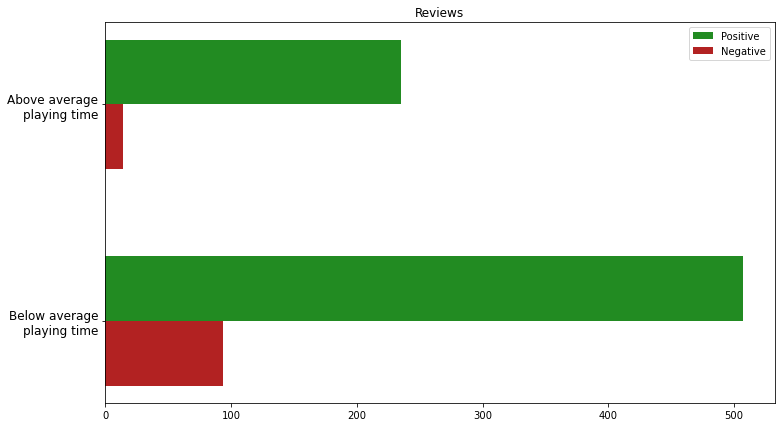

In [113]:
review_playingtime_categories = ('Above average\nplaying time', 'Below average\nplaying time')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, abyss_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, abyss_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

Despite much fewer reviews fo this patch, the average playing time at review jumped from 56 hours to 94 hours. This most likely meant a number of people who have played a bit, held off reviewing, finally reviewed at this update.

### How were the reviews during the Steam summer sale?

In [114]:
steamsale_positive = mnsdata.loc[(mnsdata['Date'] >= '2019-06-25') & (mnsdata['Date'] <= '2019-07-09') & (mnsdata['Recommended?'] == True)].count()[0]
steamsale_negative = mnsdata.loc[(mnsdata['Date'] >= '2019-06-25') & (mnsdata['Date'] <= '2019-07-09') & (mnsdata['Recommended?'] == False)].count()[0]

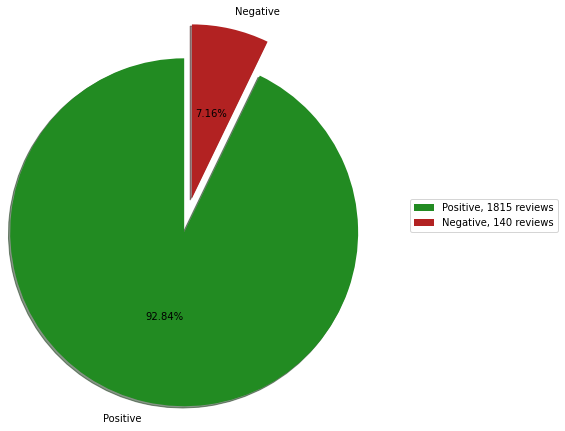

In [115]:
labels = ['Positive', 'Negative']
sizes = [steamsale_positive, steamsale_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

The summer sale took place from 25th June to 9th July. The gaming press covered it here:

https://www.laptopmag.com/articles/steam-summer-sale-2019-dates <br>
https://www.gamesradar.com/steam-summer-sale-2019-deals/ <br>
https://www.cnet.com/news/best-steam-summer-sale-2019-deals-rocket-league-rust-and-more-discounted-games/ <br>
https://www.digitaltrends.com/gaming/best-games-steam-summer-sale-2019/

### How were the reviews after the Steam summer sale broken down by playing time?

In [116]:
summersale_avg_time = mnsdata.loc[(mnsdata['Date'] >= '2019-06-25') & (mnsdata['Date'] <= '2019-07-09')]['Review Playing Time'].mean()
print(summersale_avg_time)

4215.157544757033


In [117]:
summersale_positive_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= summersale_avg_time) & (mnsdata['Date'] >= '2019-06-25') & (mnsdata['Date'] <= '2019-07-09') & (mnsdata['Recommended?'] == True)].count()[0]
summersale_negative_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= summersale_avg_time) & (mnsdata['Date'] >= '2019-06-25') & (mnsdata['Date'] <= '2019-07-09') & (mnsdata['Recommended?'] == False)].count()[0]

summersale_positive_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= summersale_avg_time) & (mnsdata['Date'] >= '2019-06-25') & (mnsdata['Date'] <= '2019-07-09') & (mnsdata['Recommended?'] == True)].count()[0]
summersale_negative_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= summersale_avg_time) & (mnsdata['Date'] >= '2019-06-25') & (mnsdata['Date'] <= '2019-07-09') & (mnsdata['Recommended?'] == False)].count()[0]

summersale_by_category_positive = [summersale_positive_above_avg, summersale_positive_below_avg]
summersale_by_category_negative = [summersale_negative_above_avg, summersale_negative_below_avg]

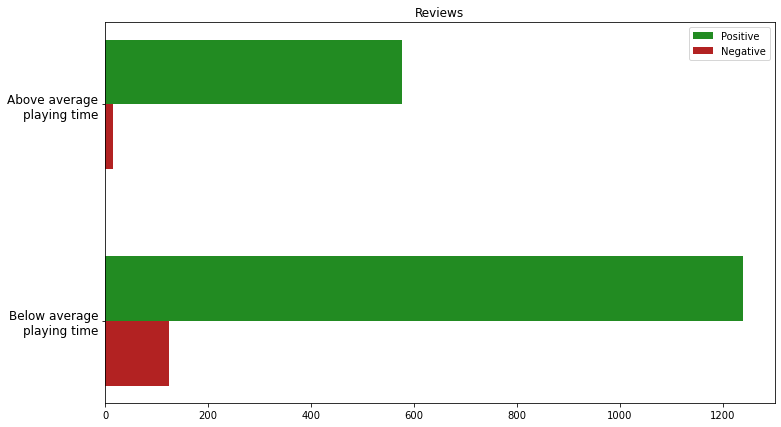

In [118]:
review_playingtime_categories = ('Above average\nplaying time', 'Below average\nplaying time')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, summersale_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, summersale_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

Are most of the reviewers new buyers? Maybe not. But at an average playing time at review sitting at over 70 hours, and even if a sizeable amount of players were not new players,the summer sale did extremely well retaining players.

### How were the reviews after the release of the Synthesis update?

In [119]:
synthesis_positive = mnsdata.loc[(mnsdata['Date'] >= '2019-11-28') & (mnsdata['Date'] <= '2020-02-17') & (mnsdata['Recommended?'] == True)].count()[0]
synthesis_negative = mnsdata.loc[(mnsdata['Date'] >= '2019-11-28') & (mnsdata['Date'] <= '2020-02-17') & (mnsdata['Recommended?'] == False)].count()[0]

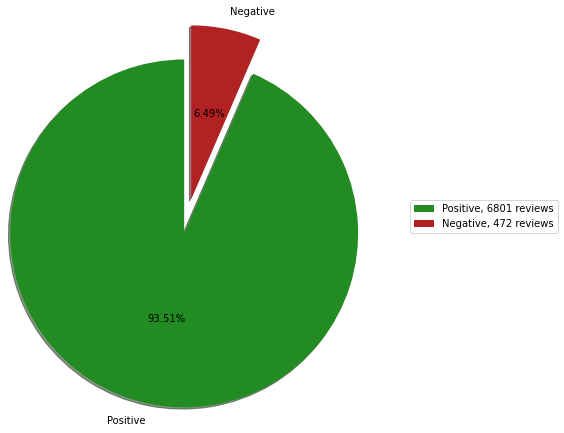

In [120]:
labels = ['Positive', 'Negative']
sizes = [synthesis_positive, synthesis_negative]
color_set = ['forestgreen', 'firebrick']

explode = ([0.2, 0.2])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors = color_set, shadow=True, startangle=90, radius=2, pctdistance=.5, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f reviews' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(1.5, 0.5), loc='center left')

plt.show()

The reception was overwhelmingly positive and over nine out of ten reviewers showed their love.

The critics were just as pleased with the update that fixed over 300 bugs, provided quality-of-life improvements, and gave feature parity between VR and non-VR players. What was even more pleasing was <i>Hello Games</i> had even more updates planned.

https://www.engadget.com/2019-11-28-no-mans-sky-synthesis-update.html

### How were the reviews after the release of the Synthesis patch broken down by playing time?

In [121]:
synthesis_avg_time = mnsdata.loc[(mnsdata['Date'] >= '2019-11-28') & (mnsdata['Date'] <= '2020-02-17')]['Review Playing Time'].mean()
print(synthesis_avg_time)

5479.199642513406


In [122]:
synthesis_positive_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= synthesis_avg_time) & (mnsdata['Date'] >= '2019-11-28') & (mnsdata['Date'] <= '2020-02-17') & (mnsdata['Recommended?'] == True)].count()[0]
synthesis_negative_above_avg = mnsdata.loc[(mnsdata['Review Playing Time'] >= synthesis_avg_time) & (mnsdata['Date'] >= '2019-11-28') & (mnsdata['Date'] <= '2020-02-17') & (mnsdata['Recommended?'] == False)].count()[0]

synthesis_positive_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= synthesis_avg_time) & (mnsdata['Date'] >= '2019-11-28') & (mnsdata['Date'] <= '2020-02-17') & (mnsdata['Recommended?'] == True)].count()[0]
synthesis_negative_below_avg = mnsdata.loc[(mnsdata['Review Playing Time'] <= synthesis_avg_time) & (mnsdata['Date'] >= '2019-11-28') & (mnsdata['Date'] <= '2020-02-17') & (mnsdata['Recommended?'] == False)].count()[0]

synthesis_by_category_positive = [synthesis_positive_above_avg, synthesis_positive_below_avg]
synthesis_by_category_negative = [synthesis_negative_above_avg, synthesis_negative_below_avg]

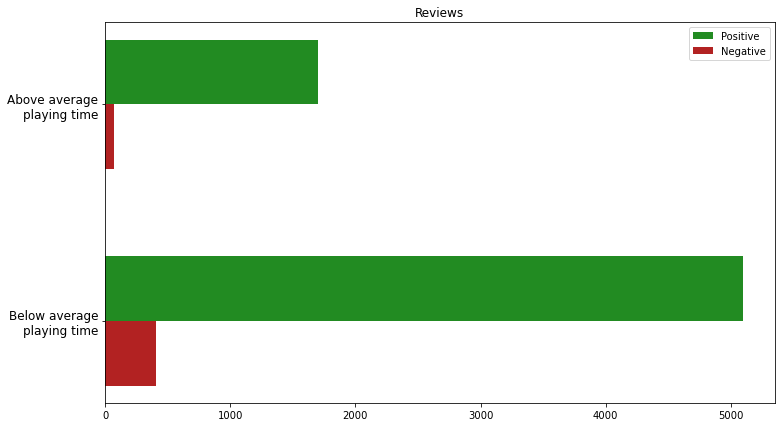

In [123]:
review_playingtime_categories = ('Above average\nplaying time', 'Below average\nplaying time')
width = 0.3

plt.figure(figsize=(12,7))

plt.title('Reviews')
plt.barh(np.arange(len(review_playingtime_categories))+width/2, synthesis_by_category_positive[::-1], width, label='Positive', color='forestgreen')
plt.barh(np.arange(len(review_playingtime_categories))-width/2, synthesis_by_category_negative[::-1], width, label='Negative', color='firebrick')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

Average playing time at review climbed back up to over 91 hours, and the reviews are overwhelmingly positive. Negative reviews above average time were nearly nonexistent.

### Does the rise in positive ratings correlate with the rise in positive reviews?

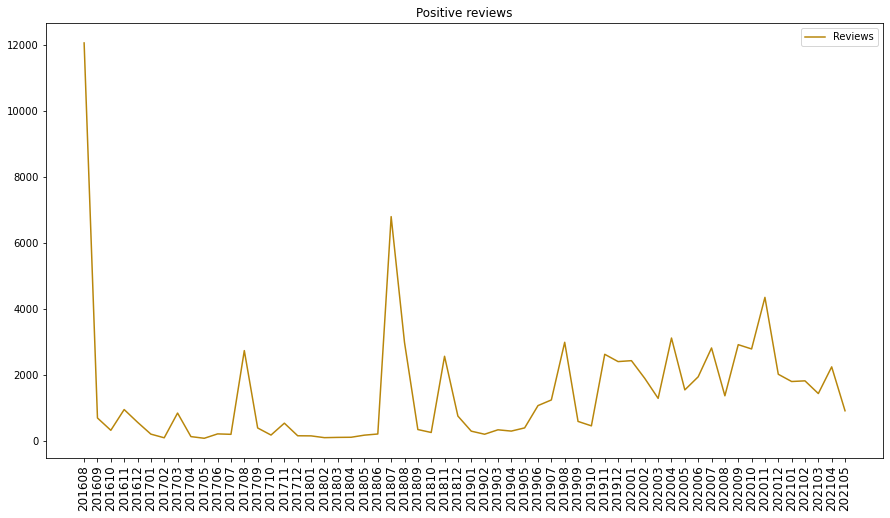

In [124]:
monthly_positives = monthly_2016_positives + monthly_2017_positives + monthly_2018_positives + monthly_2019_positives + monthly_2020_positives + monthly_2021_positives

plt.figure(figsize=(15,8))

plt.title('Positive reviews')
plt.plot(np.arange(len(monthly_positives)), monthly_positives, label='Reviews', color='darkgoldenrod')
plt.xticks(range(len(monthly_positives)), mnsdata['Monthly'].unique()[::-1], rotation='vertical', size=12)

plt.legend()

plt.show()

Mostly.

There were a few updates that were very positive but with a smaller sample, such as <i>Abyss</i>. There were a few updates that were positive but also with a larger sample, such as <i>Beyond</i>. The update that had both was <i>NEXT</i>.

<i>NEXT</i> had nearly 10.000 more positive reviews than the next update, and over 6.000 of them were just in the first week of the release of the update. No other months came close to 10.000 reviews except at launch, which that could say <i>NEXT</i> was the defining moment that got people to truly and meaningfully pay attention to the game once again.

### Did the reviews translate into meaningful engagement?

In [125]:
next_review_at_least_week = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Review Playing Time'] >= 10080)].count()[0]
next_review_at_least_three_days = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Review Playing Time'] >= 4320) & (mnsdata['Review Playing Time'] <= 10079)].count()[0]
next_review_at_least_two_days = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Review Playing Time'] >= 2880) & (mnsdata['Review Playing Time'] <= 4319)].count()[0]
next_review_at_least_one_day = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Review Playing Time'] >= 1440) & (mnsdata['Review Playing Time'] <= 2879)].count()[0]
next_review_at_least_half_day = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Review Playing Time'] >= 720) & (mnsdata['Review Playing Time'] <= 1439)].count()[0]
next_review_less_than_half_day = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Review Playing Time'] <= 719)].count()[0]

next_review_playingtime = [next_review_at_least_week, next_review_at_least_three_days, next_review_at_least_two_days, next_review_at_least_one_day, next_review_at_least_half_day, next_review_less_than_half_day]

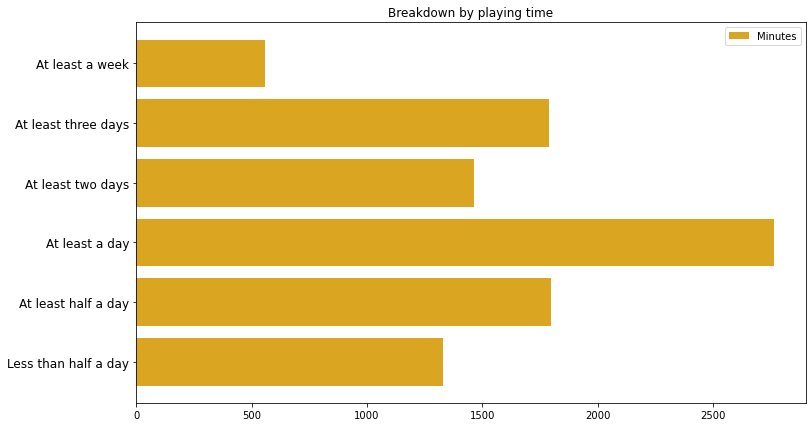

In [126]:
review_playingtime_categories = ('At least a week', 'At least three days', 'At least two days', 'At least a day', 'At least half a day', 'Less than half a day')

plt.figure(figsize=(12,7))

plt.title('Breakdown by playing time')
plt.barh(np.arange(len(review_playingtime_categories)), next_review_playingtime[::-1], label='Minutes', color='goldenrod')
plt.yticks(range(len(review_playingtime_categories)-1,-1,-1), review_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

In [127]:
next_total_at_least_week = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Total Playing Time'] >= 10080)].count()[0]
next_total_at_least_three_days = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Total Playing Time'] >= 4320) & (mnsdata['Total Playing Time'] <= 10079)].count()[0]
next_total_at_least_two_days = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Total Playing Time'] >= 2880) & (mnsdata['Total Playing Time'] <= 4319)].count()[0]
next_total_at_least_one_day = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Total Playing Time'] >= 1440) & (mnsdata['Total Playing Time'] <= 2879)].count()[0]
next_total_at_least_half_day = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Total Playing Time'] >= 720) & (mnsdata['Total Playing Time'] <= 1439)].count()[0]
next_total_less_than_half_day = mnsdata.loc[(mnsdata['Date'] >= '2018-07-24') & (mnsdata['Date'] <= '2018-10-28') & (mnsdata['Recommended?'] == True) & (mnsdata['Total Playing Time'] <= 719)].count()[0]

next_total_playingtime = [next_total_at_least_week, next_total_at_least_three_days, next_total_at_least_two_days, next_total_at_least_one_day, next_total_at_least_half_day, next_total_less_than_half_day]

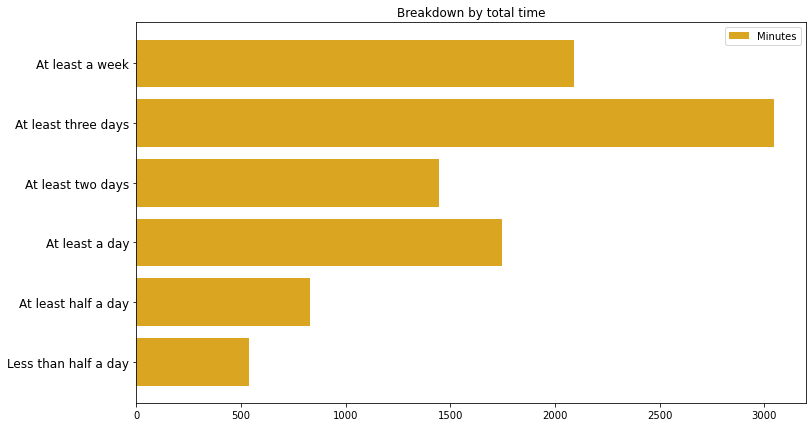

In [128]:
total_playingtime_categories = ('At least a week', 'At least three days', 'At least two days', 'At least a day', 'At least half a day', 'Less than half a day')

plt.figure(figsize=(12,7))

plt.title('Breakdown by total time')
plt.barh(np.arange(len(total_playingtime_categories)), next_total_playingtime[::-1], label='Minutes', color='goldenrod')
plt.yticks(range(len(total_playingtime_categories)-1,-1,-1), total_playingtime_categories, rotation='horizontal', size=12)

plt.legend()

plt.show()

Very.

Nearly 60% of the reviews at playing time were less than two days, but over 60%  of reviews at total time were above two days. That showed just how much the players who played and reviewed after the <i>NEXT</i> update stayed and committed to the game.

## Credits
Special thanks to <br>
https://www.youtube.com/watch?v=O5BJVO3PDeQ <br>
for the idea.

Social media:
- https://twitter.com/NoMansSky/status/802814492195295232
- https://twitter.com/Nomanssky/status/839537056510590987
- https://twitter.com/Nomanssky/status/895972770529648640
- https://twitter.com/NoMansSky/status/1021817100258762753
- https://twitter.com/NoMansSky/status/1056924437335957505
- https://twitter.com/NoMansSky/status/1200105201975336960

Official site:
- https://www.nomanssky.com/foundation-update/
- https://www.nomanssky.com/pathfinder-update/
- https://www.nomanssky.com/atlas-rises-update/
- https://www.nomanssky.com/next-update/
- https://www.nomanssky.com/abyss-update/
- https://www.nomanssky.com/synthesis-update/